# Case Study 1:

## Walmart Recruiting - Store Sales Forecasting

### 1. Business Problem

#### 1.1 Description

        Walmart has 45 stores. This 45 stores located in different regions.Each store contains many departments, 
    and participants must forecast the sales for each department in each store.

### 2. Machine Learning Probelm

#### 2.1 Data

#### 2.1.1 Data Overview

     1)This dataset consist of 5,36,634 rows
     2)The Train has 4,21,570 rows and Test has 1,15,065 rows
     3)The set is provided in CSV  formats
     4)Along with train and test data they given the store and features CSV

#### 2.1.2 Explaining The Data

    1)The Train and Test has the Store,Dept,Date,Weekly_Sales,IsHoliday columns 
    2)The store file has Store,Type,Size columns
    3)The Features file has Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
       Unemployment,IsHoliday

#### 2.1.3 Task

    We need to Forecast the weekly sales in each stores and department  

# 3. Exploratory Data Analysis

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer


## 3.1 Reading data and basic stats

In [2]:
Train_df = pd.read_csv("data_2w/train.csv")

print("Number of data points:",Train_df.shape[0])

Number of data points: 421570


In [3]:
Train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
store_df = pd.read_csv("data_2w/stores.csv")

print("Number of data points:",store_df.shape[0])

Number of data points: 45


In [5]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features_df = pd.read_csv("data_2w/features.csv")

print("Number of data points:",features_df.shape[0])

Number of data points: 8190


In [7]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
train_features_com=pd.merge(Train_df, features_df, on=['Store','Date'],how='left')

print("Number of data points:",train_features_com.shape[0])

Number of data points: 421570


In [9]:
train_features_com.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
Train_comb_df=pd.merge(train_features_com, store_df, on='Store',how='left')

print("Number of data points:",Train_comb_df.shape[0])

Number of data points: 421570


In [11]:
Train_comb_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [12]:
Train_comb_df['MarkDown1'] = Train_comb_df['MarkDown1'].fillna(0)
Train_comb_df['MarkDown2'] = Train_comb_df['MarkDown2'].fillna(0)
Train_comb_df['MarkDown3'] = Train_comb_df['MarkDown3'].fillna(0)
Train_comb_df['MarkDown4'] = Train_comb_df['MarkDown4'].fillna(0)
Train_comb_df['MarkDown5'] = Train_comb_df['MarkDown5'].fillna(0)

In [13]:
Train_comb_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [14]:
Train_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_y     421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(2), float64(10), int64(3), object(2)
memory usage: 52.3+ MB


### Observation:

     1)There are 17 columns and 4,21,570 rows
     2)All the columns has not null value

In [28]:
import time
import datetime

def convert_to_unix(s):
    return int(time.mktime(datetime.datetime.strptime(s, '%Y-%m-%d').timetuple()))




In [29]:
date= [convert_to_unix(x) for x in Train_comb_df['Date'].values]

In [30]:
date[1]

1265913000

In [31]:
Train_comb_df['date']=date

In [34]:
Train_comb_df.head()#1325183400

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,date
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1265308200
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,1265913000
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,1266517800
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,1267122600
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315,1267727400


In [ ]:
train_df=[]
dev_df=[]
test_df=[]
for index,row in Train_comb_df.iterrows():
    print(index)
    if index==143:
        break
    if index<=100:
        for index_2,row_2 in Train_comb_df.iterrows():
            if row['date'] == row_2['date']:
                train_df.append(row_2)
    if index > 100 and index < 116:
        for index_2,row_2 in Train_comb_df.iterrows():
            if row['date'] == row_2['date']:
                dev_df.append(row_2)
                
    if index >= 116:
        for index_2,row_2 in Train_comb_df.iterrows():
            if row['date'] == row_2['date']:
                test_df.append(row_2)
        

In [ ]:
df = pd.DataFrame(train_df)
df_dev = pd.DataFrame(dev_df)
df_test = pd.DataFrame(test_df)

df.to_csv('out_train.csv')
df_dev.to_csv('out_dev.csv')
df_test.to_csv('out_test.csv')

In [81]:
train_df = pd.read_csv("train_out.csv")

print("Number of data points:",train_df.shape[0])

Number of data points: 421570


In [82]:
test_df = pd.read_csv("test_out.csv")

print("Number of data points:",test_df.shape[0])

Number of data points: 115064


Train   - 297105

Dev     -  44608

Test    -  79857

Total  - 421570
----------------------


In [71]:
pre_df = pd.read_csv("pre_out.csv")

print("Number of data points:",pre_df.shape[0])

Number of data points: 297105


In [72]:
pre_df_xg = pd.read_csv("pre_out_xg.csv")

print("Number of data points:",pre_df_xg.shape[0])

Number of data points: 297105


# 3.2.1 Distribution of data points among output classes

In [83]:
train_df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,date
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1265328000
1,143,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1265328000
2,286,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1265328000
3,429,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1265328000
4,572,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1265328000


In [96]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Weekly_Sales')
    plt.title('Store vs Weekly_Sales')
    plt.xticks(ind, list(data[xtick].values))
    plt.show()

In [101]:
def univariate_barplots(data, col1, col2, top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(train_df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(train_df.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(train_df.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    #print(temp.head(5))
    #print("="*50)
    #print(temp.tail(5))

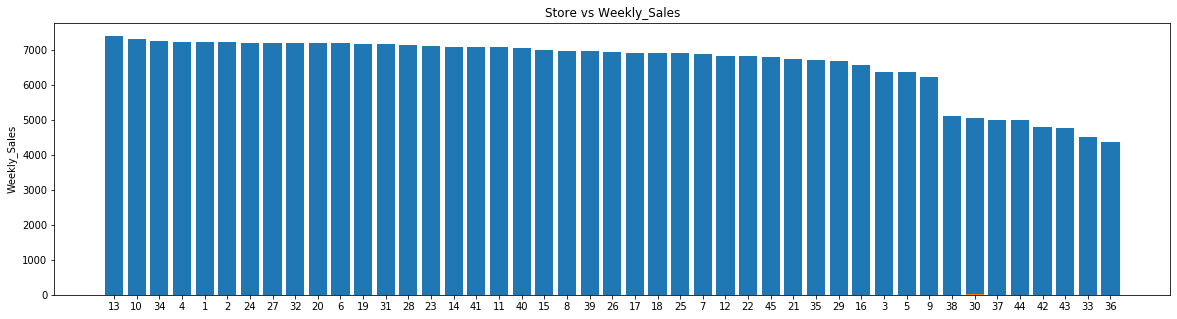

In [102]:
import warnings 
from time import time

import datetime
warnings.filterwarnings('ignore')

univariate_barplots(train_df, 'Store', 'Weekly_Sales', False)

## Observation:

1)Store 36 and 33 has the lowest weekly below 4500 sales in given data

2)Store 10 and 13 has the highest  weekly sales in given data

In [4]:
ts = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
ts = ts.set_index('Date')
ts.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
       '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
      dtype='object', name='Date', length=143)

In [94]:
ts1 = pre_df.groupby('Date')['Pre_Sales'].sum().reset_index()
ts1 = ts1.set_index('Date')
ts1.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2011-11-04', '2011-11-11', '2011-11-18', '2011-11-25', '2011-12-02',
       '2011-12-09', '2011-12-16', '2011-12-23', '2011-12-30', '2012-01-06'],
      dtype='object', name='Date', length=101)

In [95]:
ts2 = pre_df_xg.groupby('Date')['Pre_Sales'].sum().reset_index()
ts2 = ts2.set_index('Date')
ts2.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2011-11-04', '2011-11-11', '2011-11-18', '2011-11-25', '2011-12-02',
       '2011-12-09', '2011-12-16', '2011-12-23', '2011-12-30', '2012-01-06'],
      dtype='object', name='Date', length=101)

In [7]:
ts.iloc[1]

Weekly_Sales    48336677.63
Name: 2010-02-12, dtype: float64

In [8]:
ts

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2011-12-09,55561147.70
2011-12-16,60085695.94
2011-12-23,76998241.31


In [6]:
r=train_df[train_df['IsHoliday']==True]

In [7]:
r=r['Date'].drop_duplicates() 

In [8]:
holiday_date_=[]
for i in r:
    holiday_date_.append(i)
    
holiday_date_

['2010-02-12',
 '2010-09-10',
 '2010-11-26',
 '2010-12-31',
 '2011-02-11',
 '2011-09-09',
 '2011-11-25',
 '2011-12-30',
 '2012-02-10',
 '2012-09-07']

In [9]:
holiday_date=[]
holiday_sale=[]
k=0
for i in ts.iterrows():
    if i[0] in holiday_date_:
        holiday_date.append(k)
        holiday_sale.append(i[1]['Weekly_Sales'])
    k=k+1

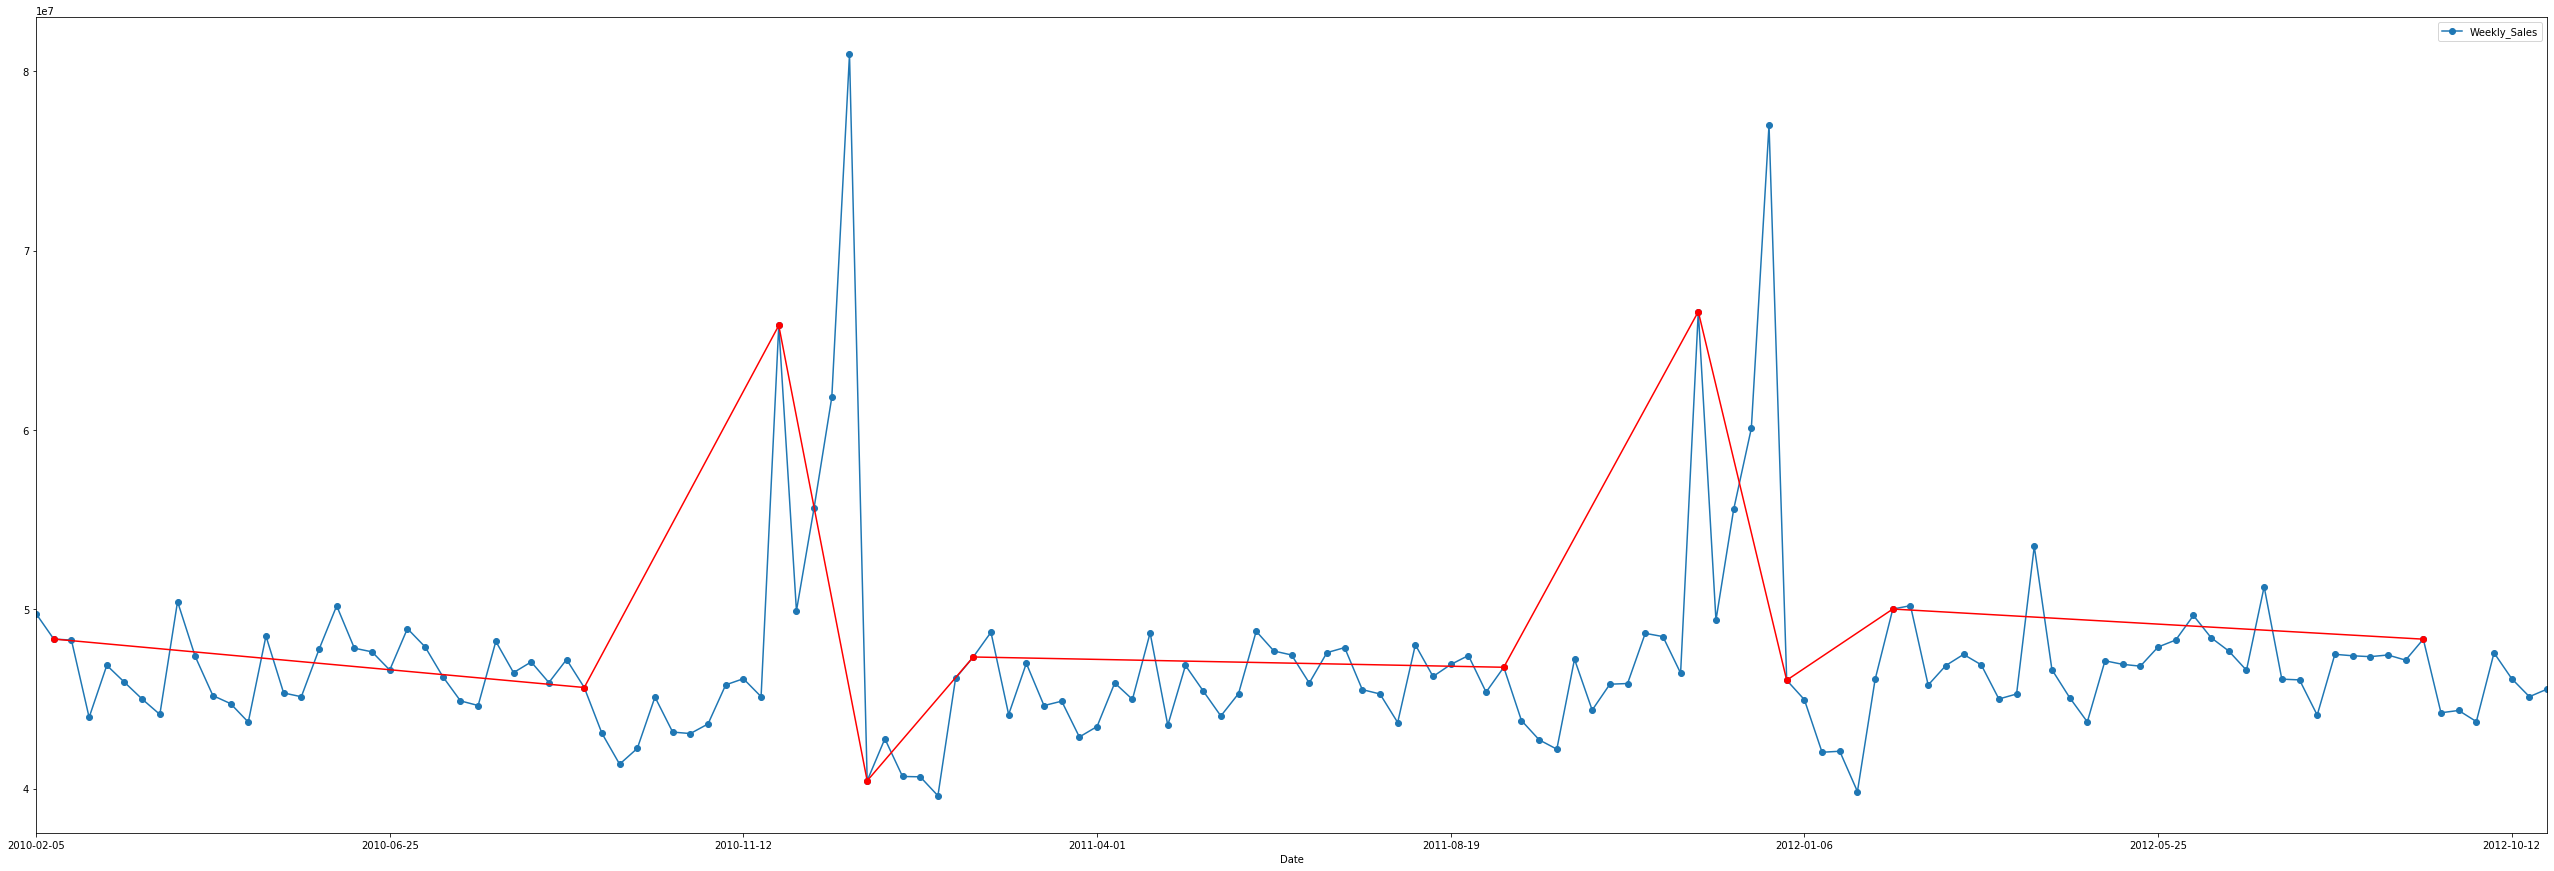

In [10]:

ts.plot(figsize=(45,15),marker='o')
plt.plot(holiday_date,holiday_sale,color='red',marker='o')





## Observation:

1)The red represent the holiday sale the blue represent the sale per week

2)The Thanksgiving: 26-Nov-10, 25-Nov-11 and Christmas: 31-Dec-10, 30-Dec-11 are the peek sale 

3)After Thanksgiving week holiday the next week and  holiday week  has drop in sale

4)After the Christmas week 31-Dec-10, 30-Dec-11 the sale has been reduced 

5)In Month of Jun and July the sale has been normal 

In [11]:
store_size=train_df[['Store','Size']]

In [12]:
store_size=store_size.drop_duplicates()

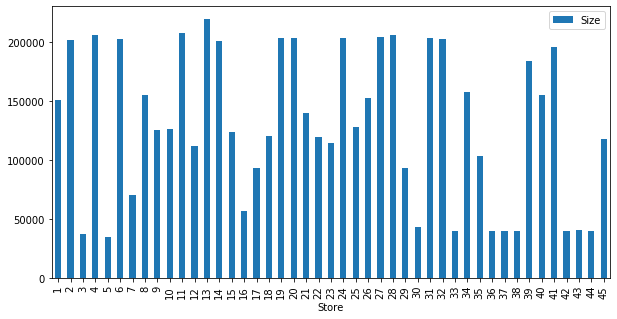

In [13]:

store_size.plot.bar(x='Store', y='Size',figsize=(10,5))

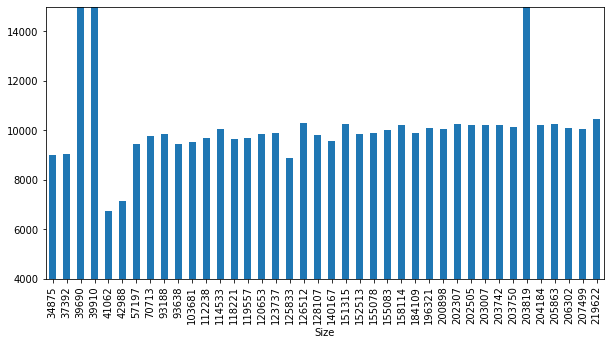

In [14]:
plt.figure(figsize=(10,5))
plt.ylim((4000,15000))
train_df.groupby("Size")['Weekly_Sales'].count().plot.bar()

## Observation:

1) Since the store 13 has large size the sales is higher 

2)The stores 36,33,37,38 are small the sales also less

Department weekly sales for store: 1


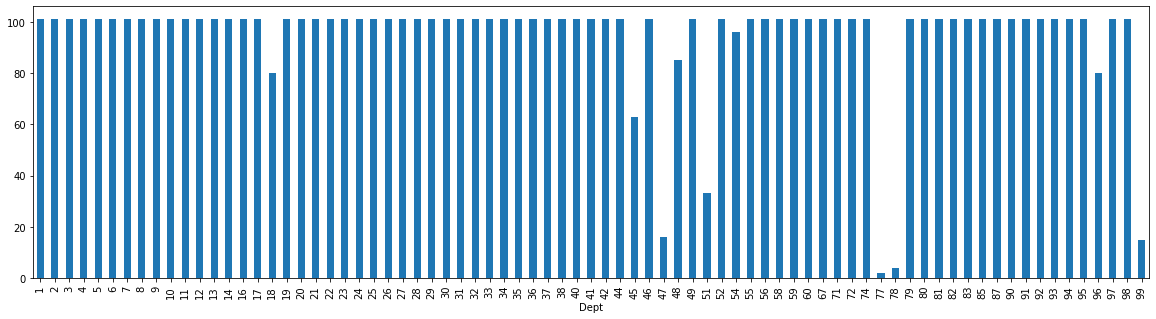

Department weekly sales for store: 2


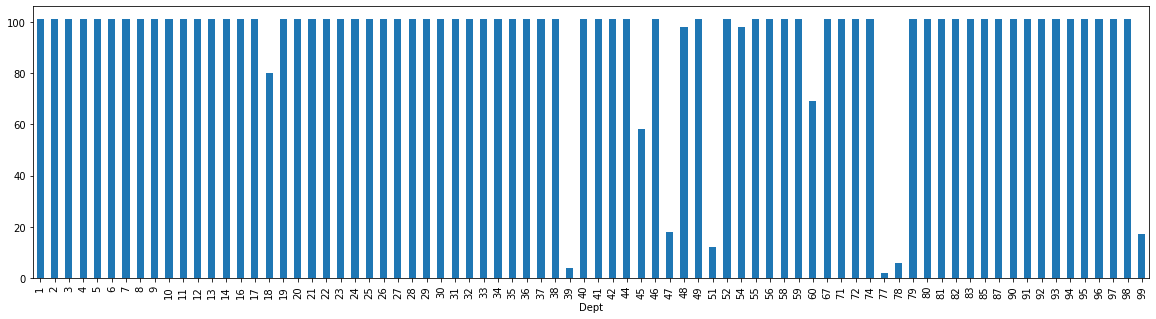

Department weekly sales for store: 3


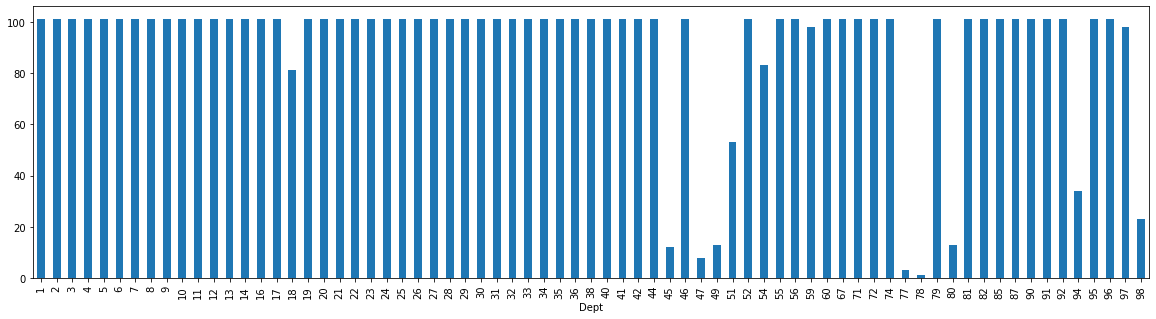

Department weekly sales for store: 4


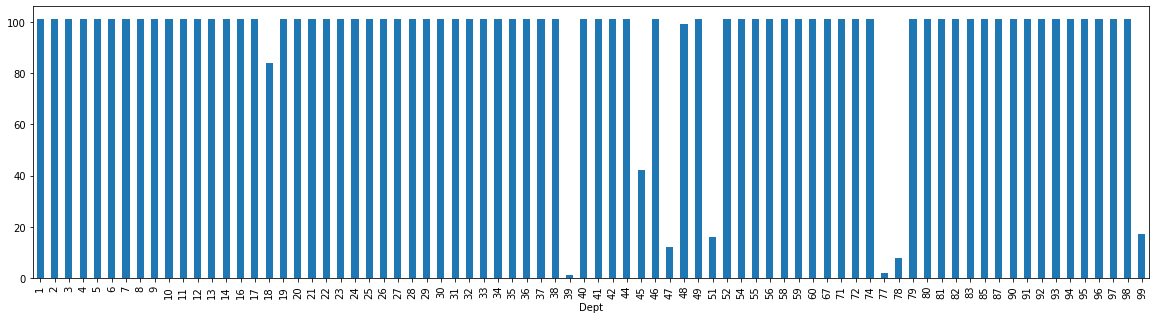

Department weekly sales for store: 5


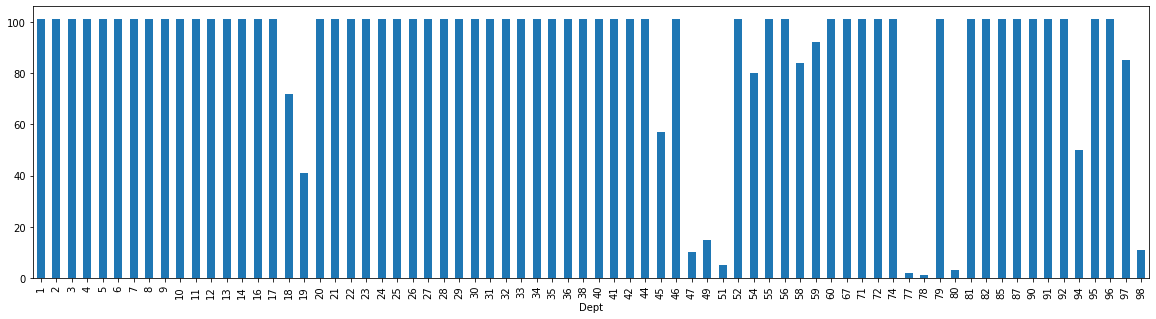

Department weekly sales for store: 6


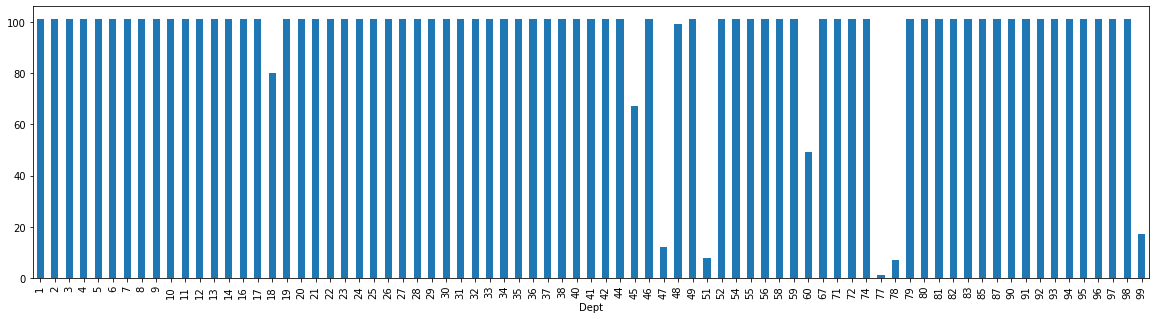

Department weekly sales for store: 7


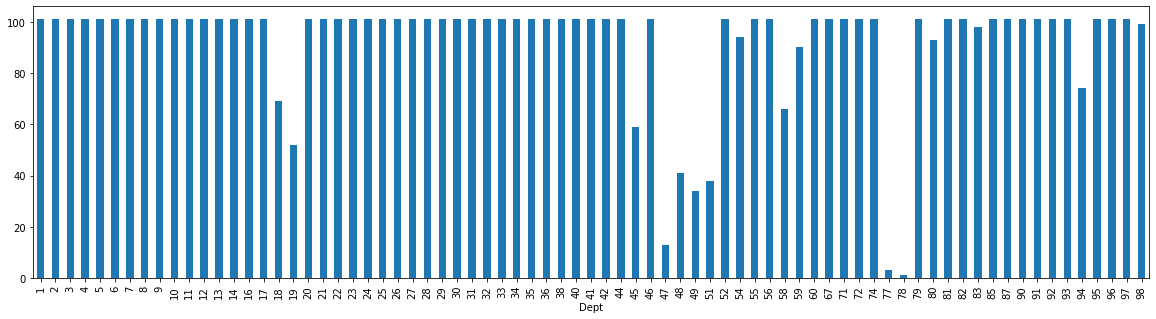

Department weekly sales for store: 8


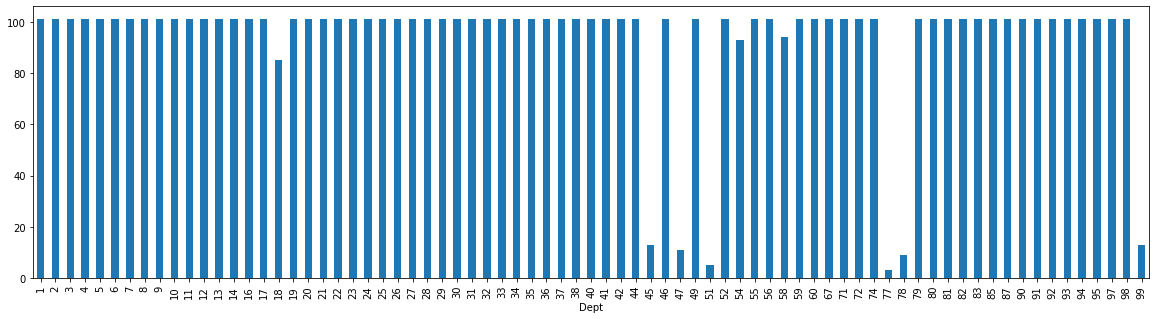

Department weekly sales for store: 9


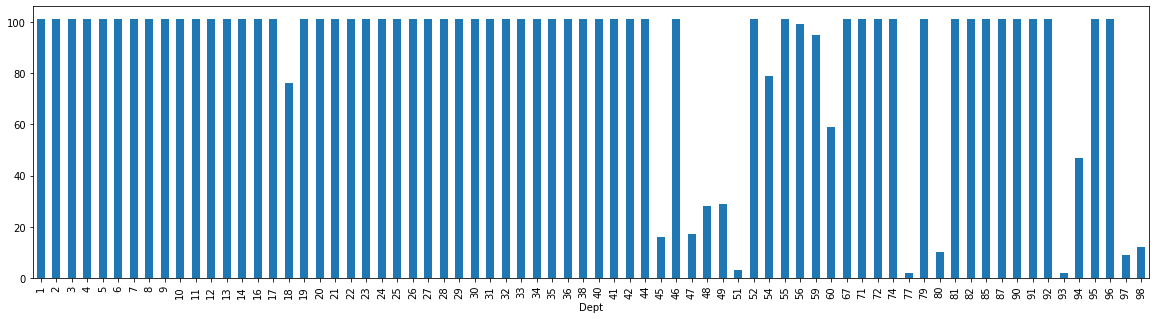

Department weekly sales for store: 10


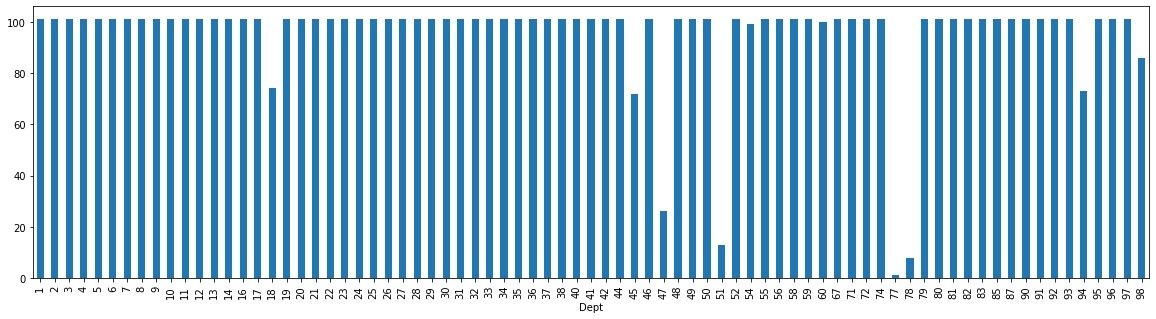

Department weekly sales for store: 11


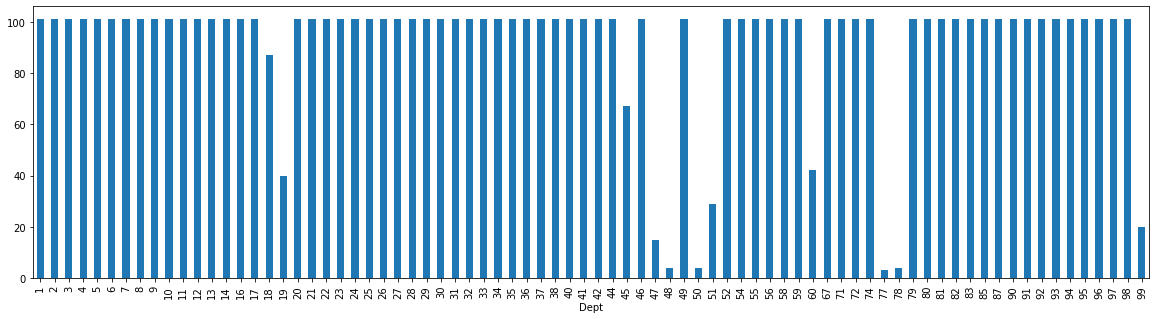

Department weekly sales for store: 12


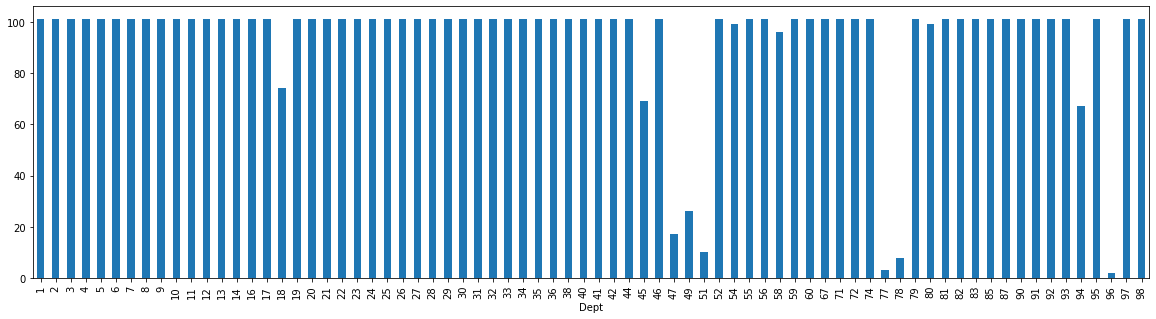

Department weekly sales for store: 13


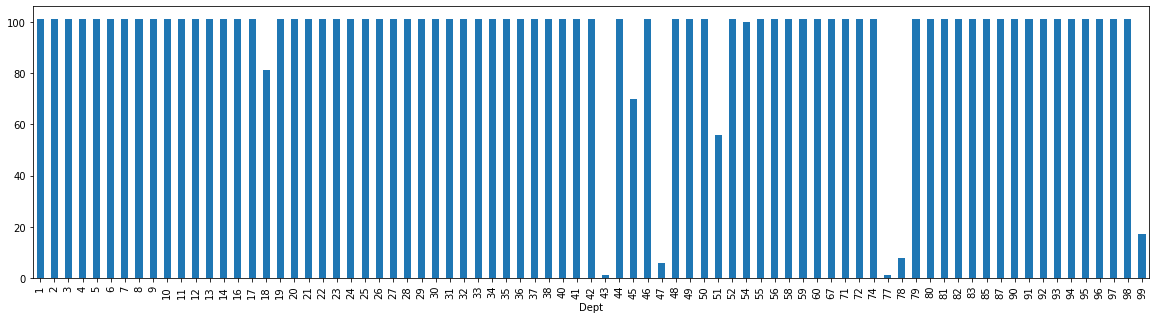

Department weekly sales for store: 14


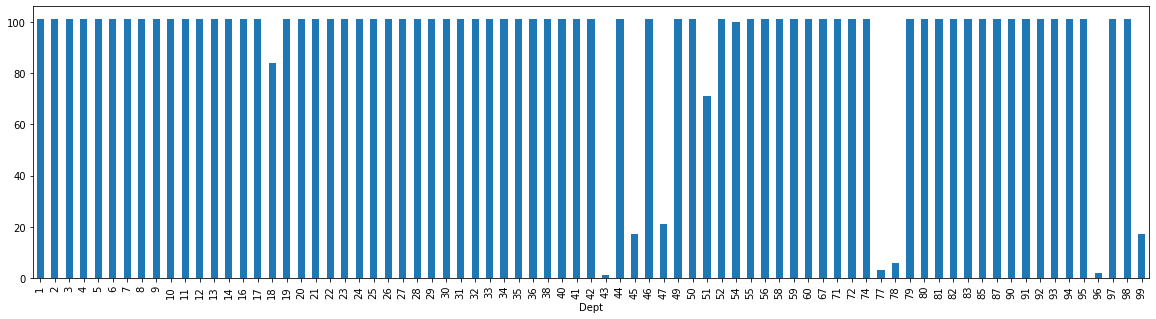

Department weekly sales for store: 15


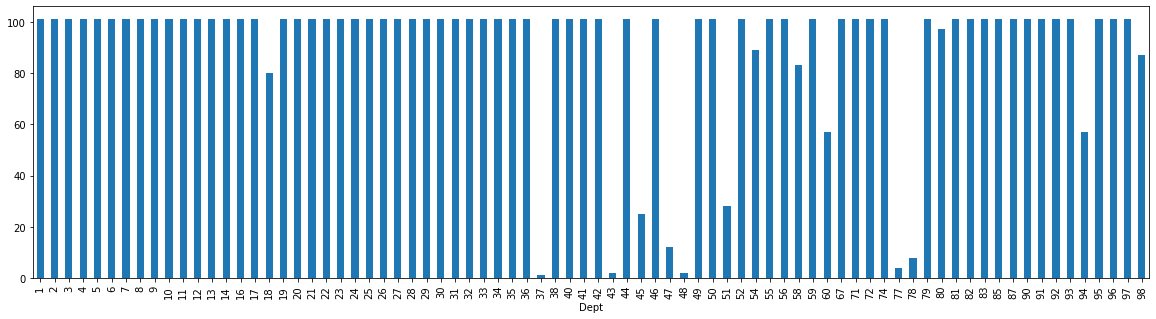

Department weekly sales for store: 16


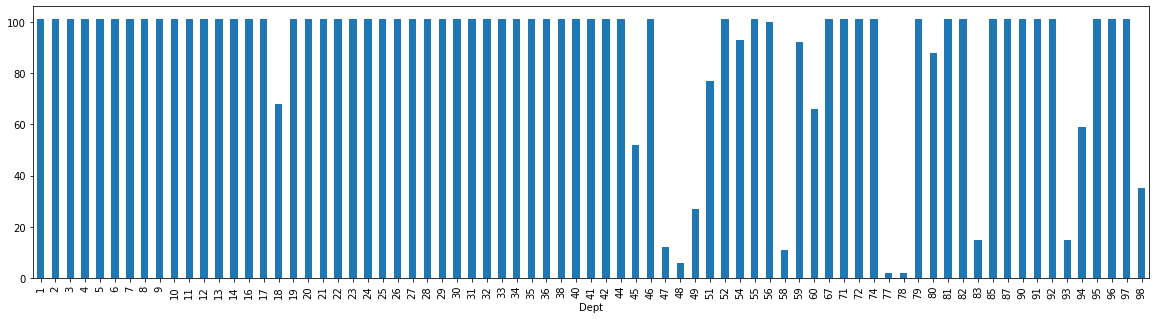

Department weekly sales for store: 17


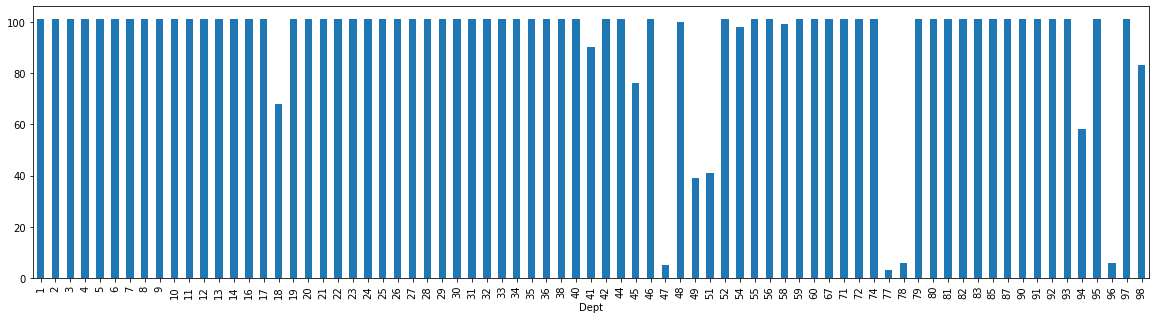

Department weekly sales for store: 18


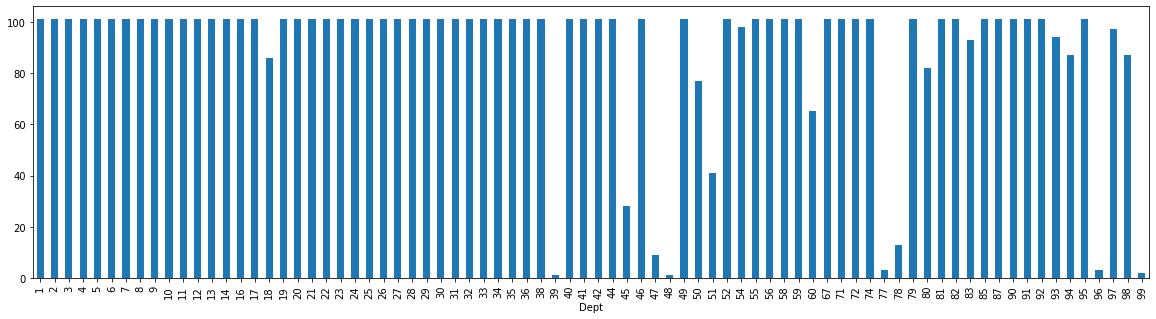

Department weekly sales for store: 19


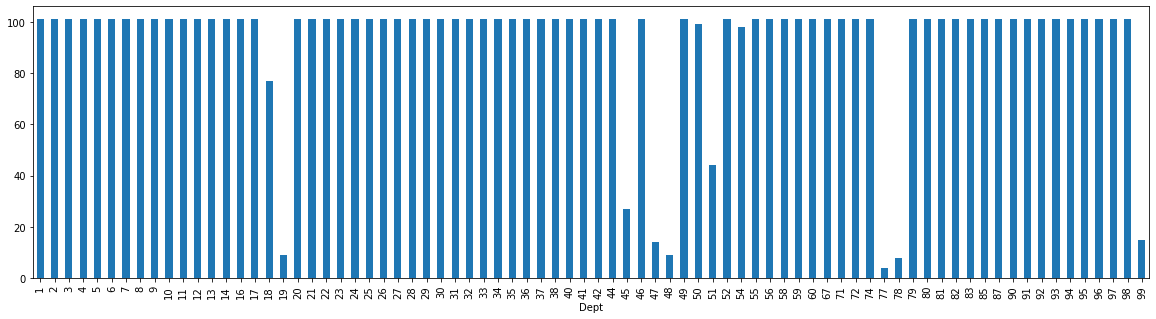

Department weekly sales for store: 20


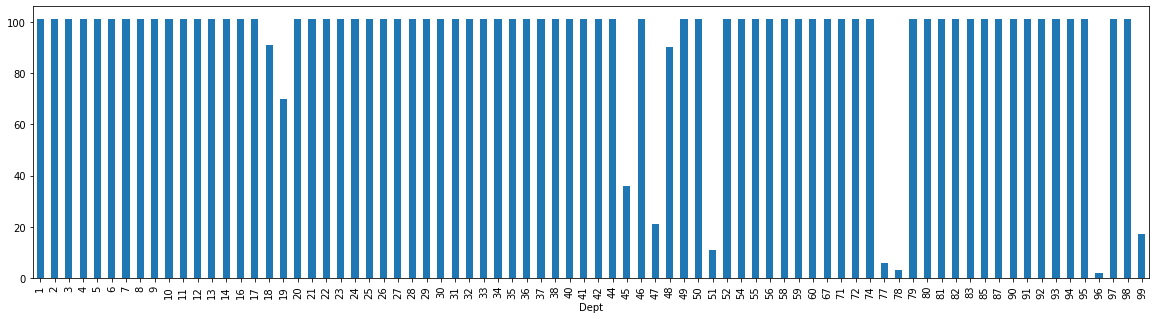

Department weekly sales for store: 21


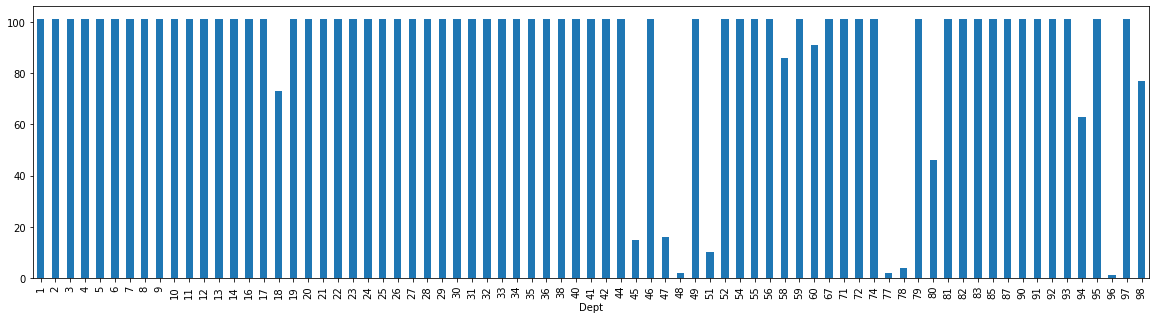

Department weekly sales for store: 22


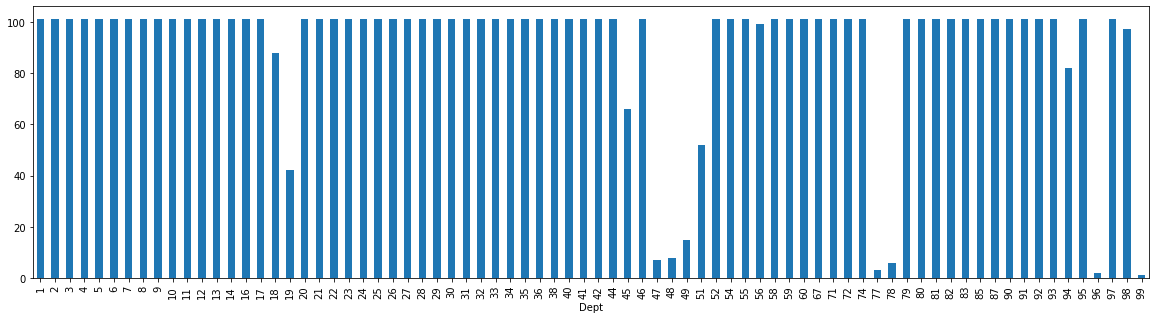

Department weekly sales for store: 23


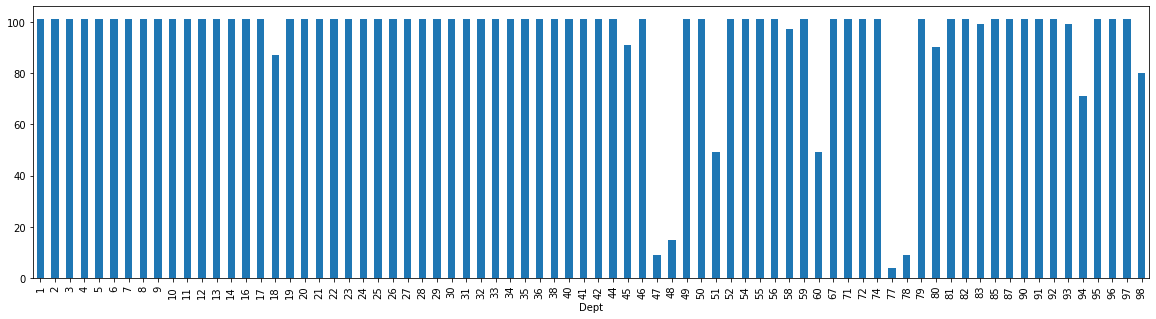

Department weekly sales for store: 24


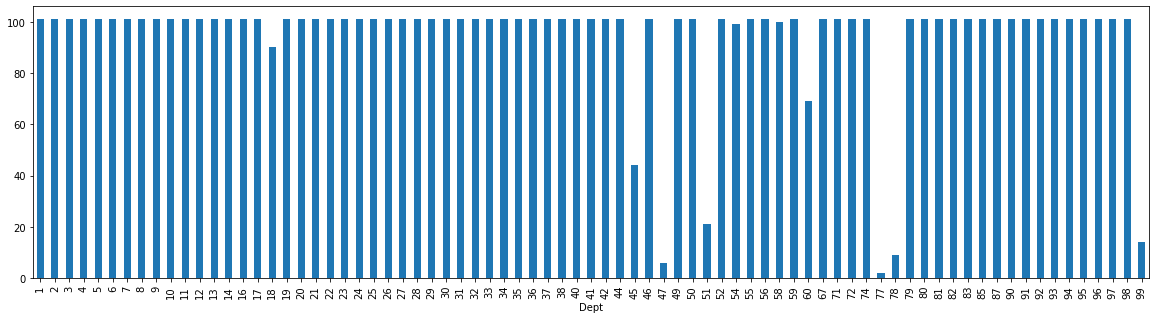

Department weekly sales for store: 25


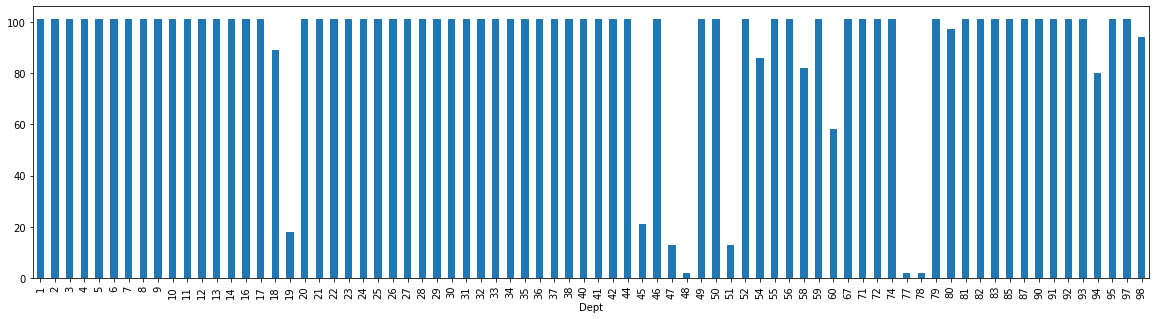

Department weekly sales for store: 26


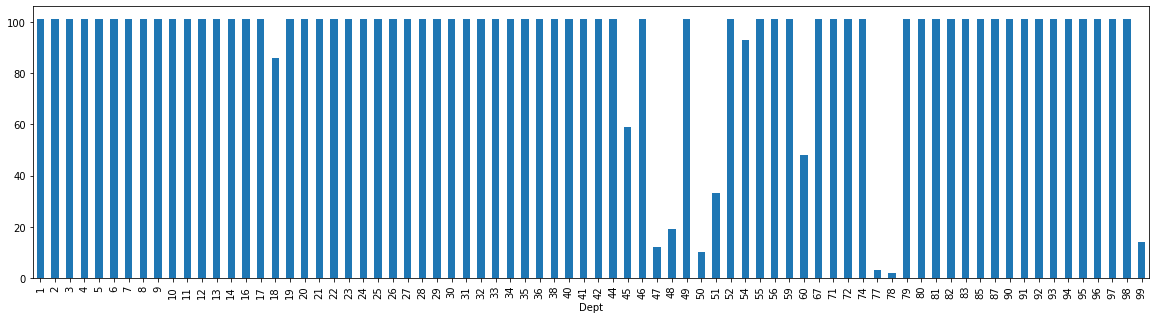

Department weekly sales for store: 27


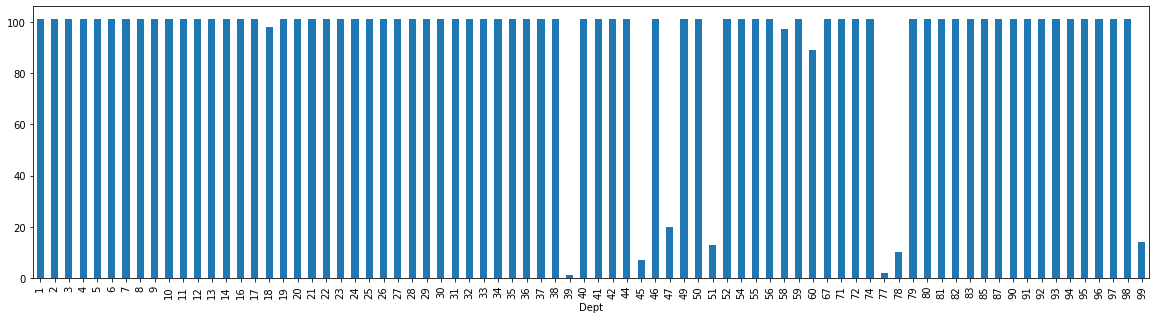

Department weekly sales for store: 28


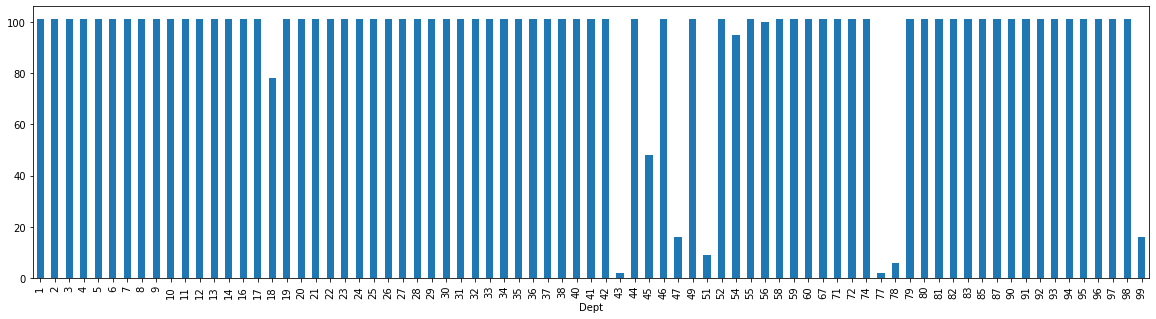

Department weekly sales for store: 29


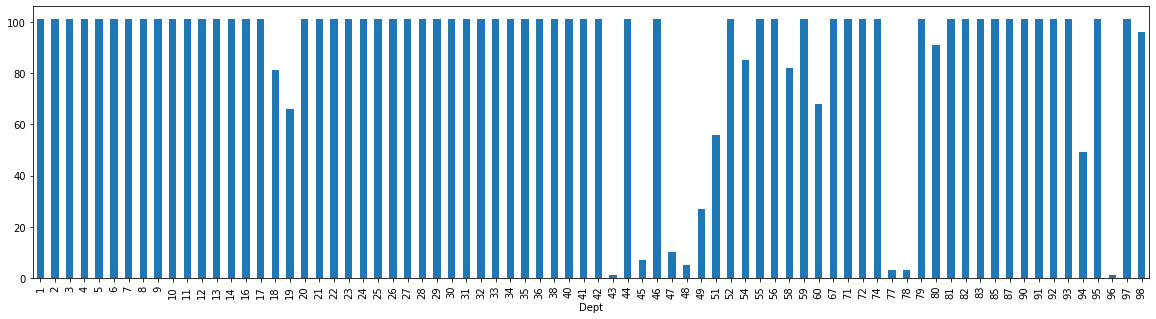

Department weekly sales for store: 30


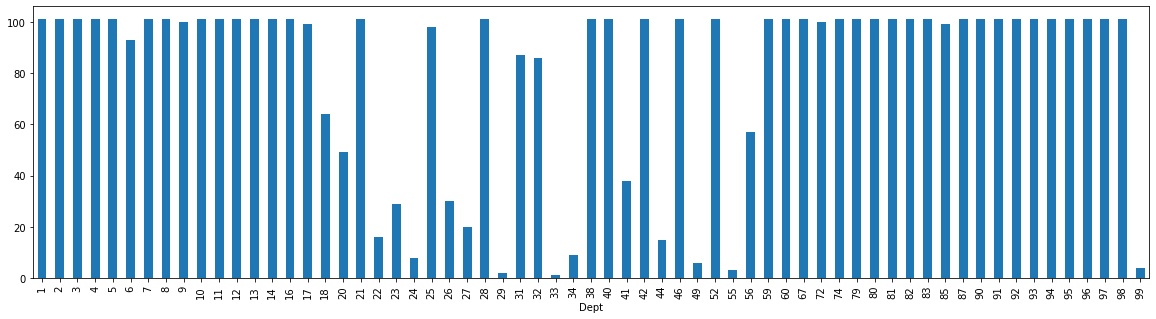

Department weekly sales for store: 31


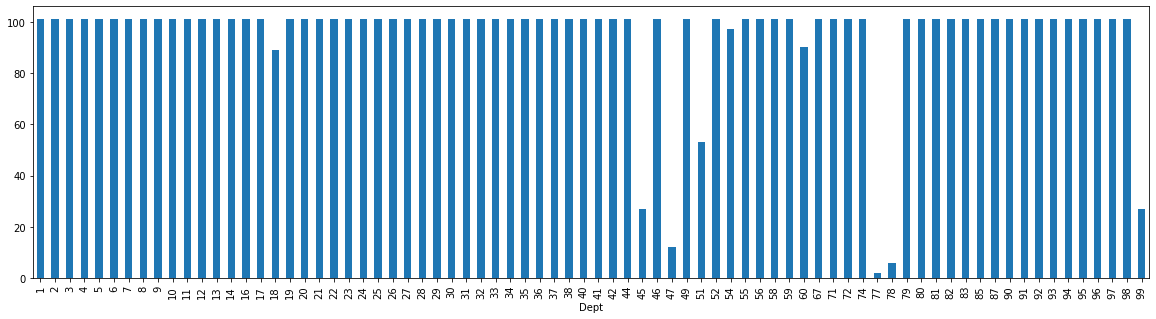

Department weekly sales for store: 32


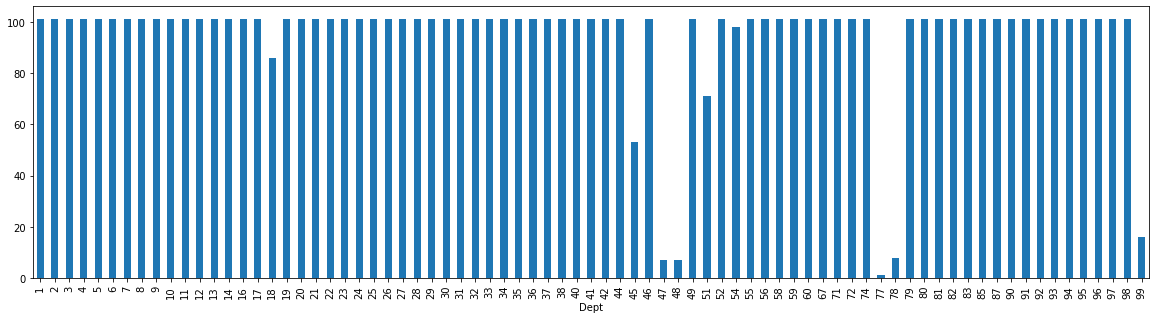

Department weekly sales for store: 33


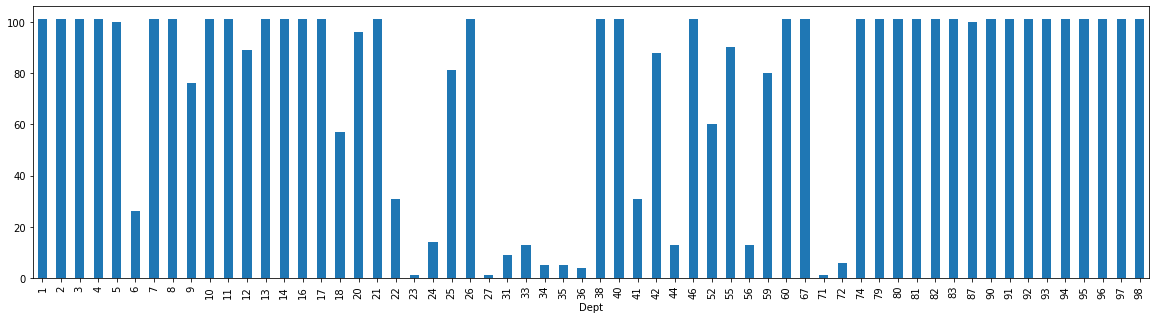

Department weekly sales for store: 34


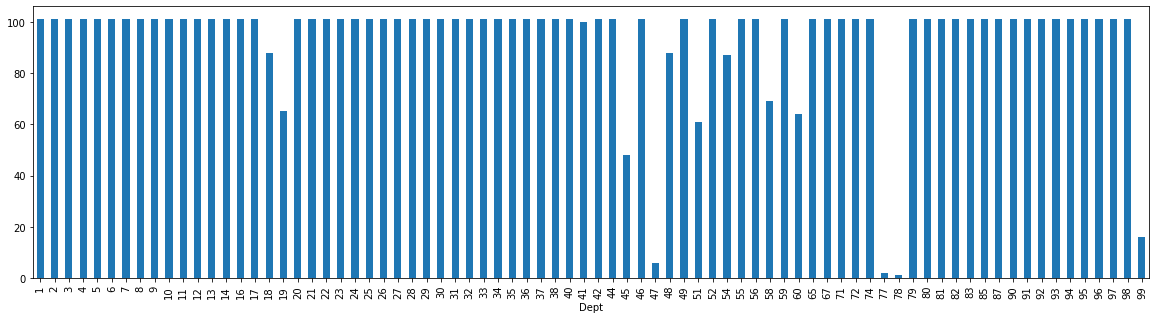

Department weekly sales for store: 35


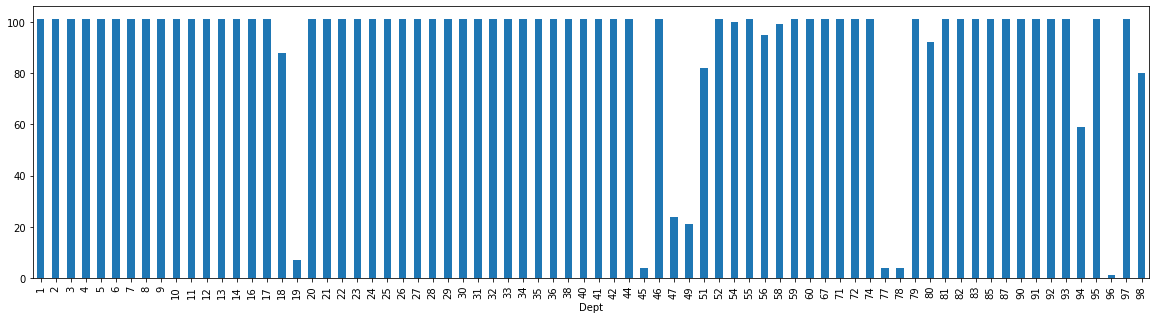

Department weekly sales for store: 36


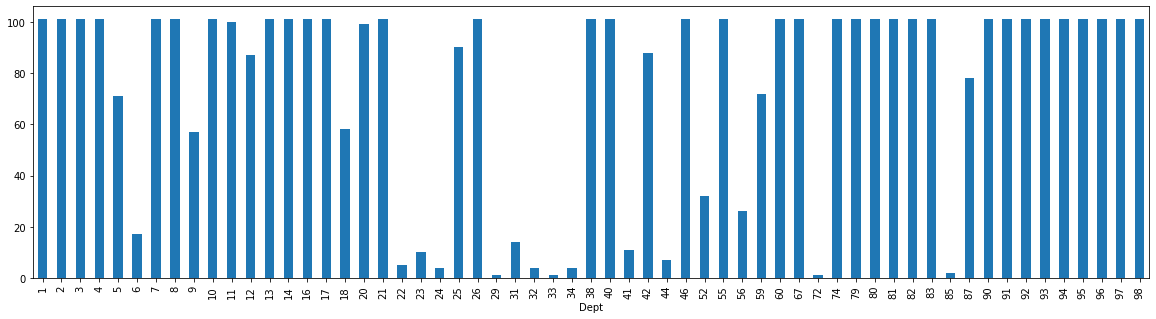

Department weekly sales for store: 37


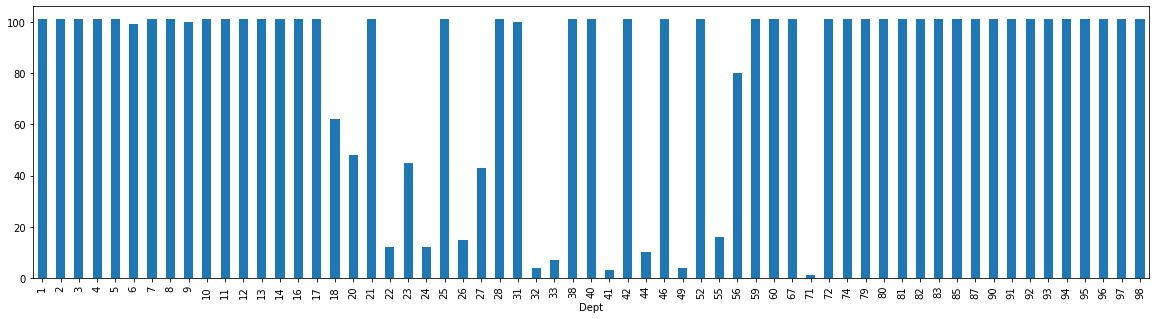

Department weekly sales for store: 38


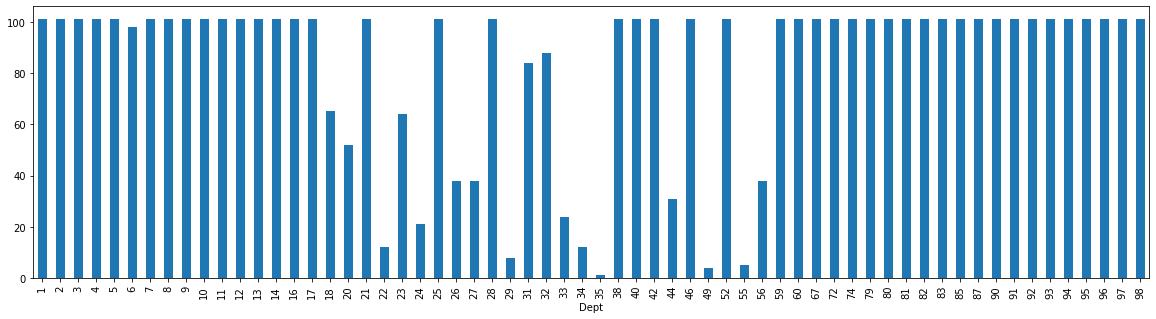

Department weekly sales for store: 39


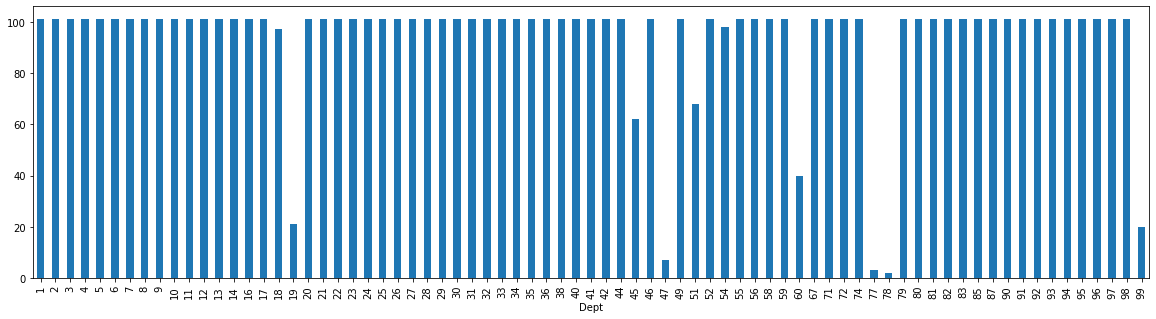

Department weekly sales for store: 40


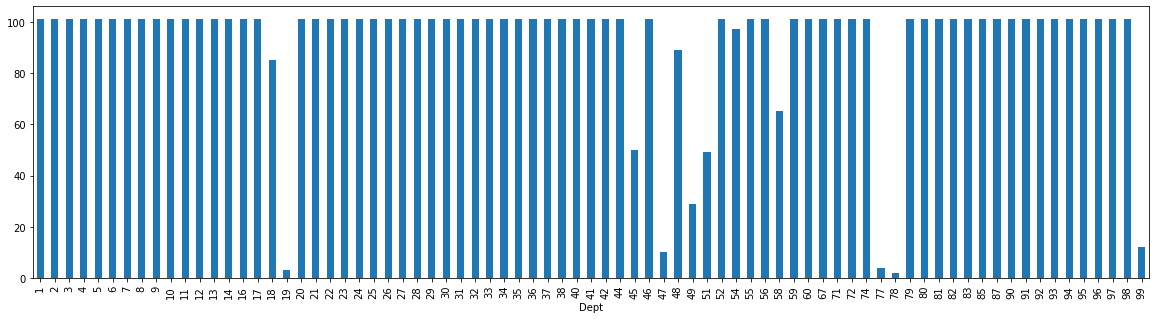

Department weekly sales for store: 41


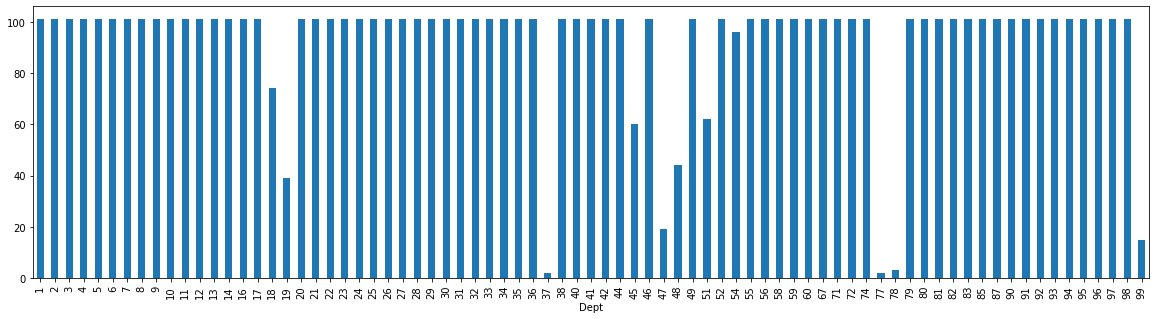

Department weekly sales for store: 42


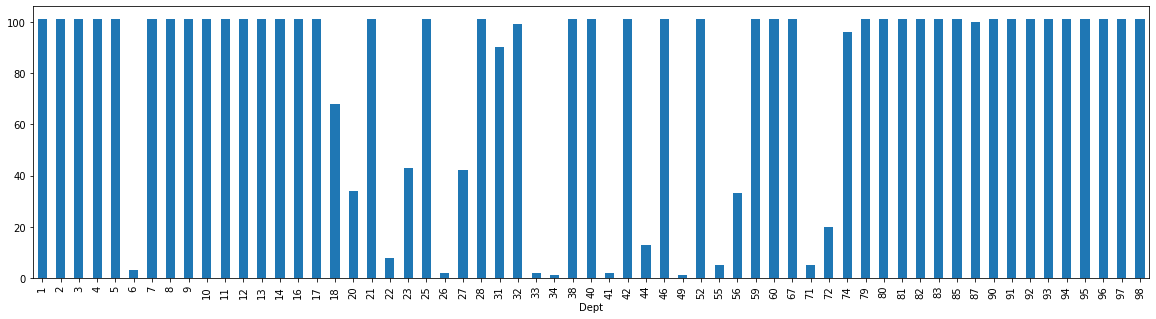

Department weekly sales for store: 43


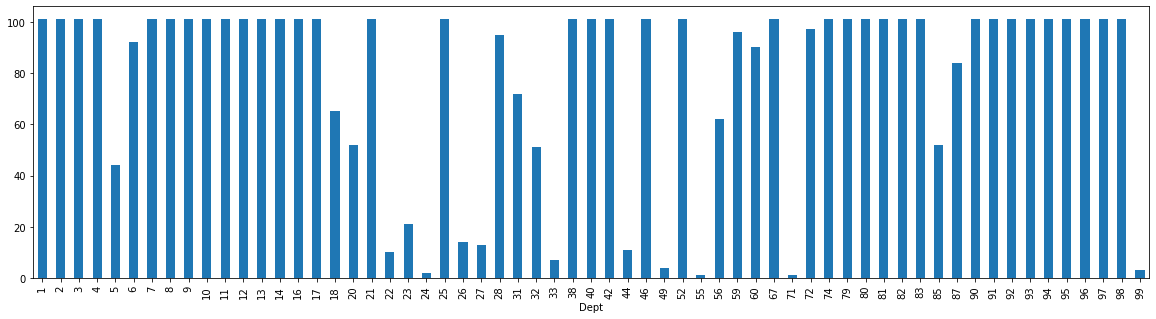

Department weekly sales for store: 44


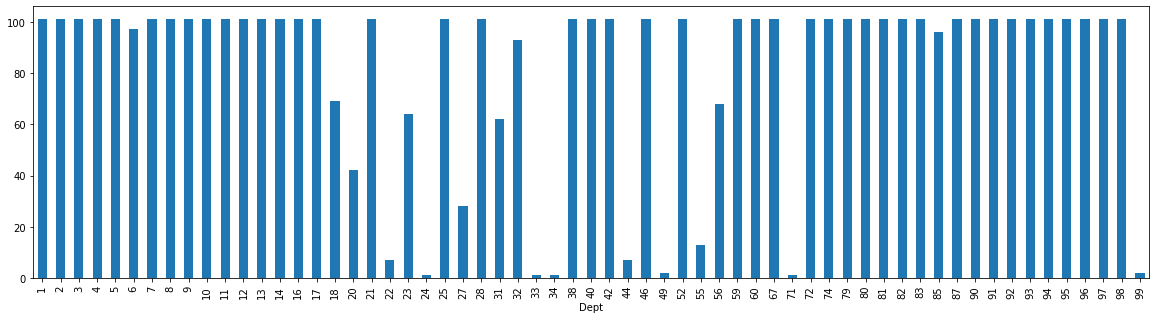

Department weekly sales for store: 45


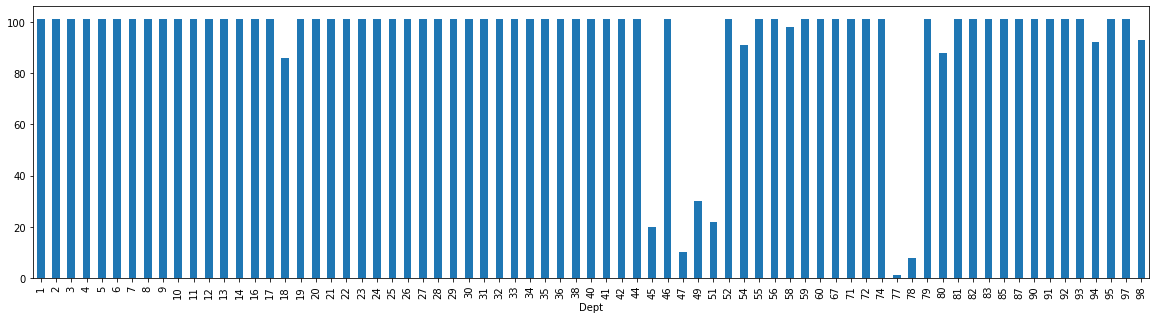

In [22]:


for i in range(46):
    if i!=0:
        plt.figure(figsize=(20,5))
        print("Department weekly sales for store:",i)       
        store_1= train_df[train_df['Store']==i]
        store_1.groupby("Dept")['Weekly_Sales'].count().plot.bar()
        plt.show()




## Observation :

    In which stores of the departments has lower sales are show below 

store 1- department  -low 47,77,78

store 2- department  -low 39,47,51,77,78

store 3- department  -low 45,47,49,77,78,80

store 4- department  -low 39,47,77,78

store 5- department  -low 47,49,51,77,78,80

store 6- department  -low 47,51,77,78

store 7- department  -low 47,77,78

store 8- department  -low 45,47,51,77,78

store 9- department  -low 45,47,51,77,80

store 10- department  -low 47,51,77,78

store 11- department   -low 47,48,50,51,77,78

store 12- department  -low 47,51,77,80

store 13- department  -low 43,47,77,78,99

store 14- department   -low 43,45,47,77,78,96,99

store 15- department  -low 37,43,47,48,77,78


store 16- department  -low 47,48,58,77,78

store 17- department   -low 47,77,78,96

store 18- department  -low 39,47,48,77,78,96,99

store 19- department  -low 47,48,77,78,99

store 20- department   -low 51,77,78,96

store 21- department  -low 45,47,48,51,77,78,96

store 22- department  -low 47,48,77,78,96,99

store 23- department   -low 47,48,77,78,96

store 24- department  -low 47,77,78,99

store 25- department  -low 47,48,77,78

store 26- department   -low 47,48,50,77,78,99

store 27- department  -low 39,45,47,51,77,78,99

store 28- department  -low 43,47,51,77,78,99

store 29- department   -low 43,45,47,48,77,78,96

store 30- department  -low 22,24,29,33,49,55

store 31- department  -low 47,77,78

store 32- department   -low 47,48,77,78,99

store 33- department  -low 23,27,34,35,36,71,72

store 34- department  -low 47,77,78

store 35- department   -low 19,45,77,78

store 36- department  -low 22,24,29,32,33,34,72,85

store 37- department  -low 32,33,41,44,49,71

store 38- department   -low 22,29,49,55

store 39- department  -low 19,47,77,78

store 40- department  -low  19,47,77,78

store 41- department   -low 37,77,78

store 42- department  -low 22,26,33,34,49,71,72

store 43- department  -low  22,24,33,49,55,71,99

store 44- department   -low 24,33,34,49,71,99

store 45- department  -low 47,77,78

#### Department 47,48,77,78,96,99 are occurring low in almost all the stores .

In [62]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
'''
Adding the columns Super_Bowl_Day,Labor_Day,Thanksgiving_Day,Christmas_Day based on given date 

also we find that next week of Thanksgiving Days the sales has been droped so i add that also as features 
Next_Week_Of_Thanksgiving

like the same for next holiday week of Thanksgiving Days the sales ha been droped Next_Holiday_Week_Of_Thanksgiving

for next week of Christmas also Next_Week_Of_Christmas

i also added the week of the year week_of_year and month of the year month_of_year as features
'''

Super_Bowl_Days=['2010-02-12','2011-02-11','2012-02-10','2013-02-08']
Labor_Days=['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving_Days=['2010-11-26','2011-11-25','2012-11-23','2013-11-29']
Christmas_Days=['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

before_Christmas_Days=['2010-12-24','2011-12-23','2012-12-21','2013-12-20']

low_sales_departments=[47,48,77,78,96,99]



def Adding_festival_days(data,current_year,count_week):
    Super_Bowl_Day=[]
    Labor_Day=[]
    Thanksgiving_Day=[]
    Christmas_Day=[]
    before_Christmas_Day=[]
    low_sales_dep=[]

    Next_Week_Of_Thanksgiving=[]
    Next_Holiday_Week_Of_Thanksgiving=[]
    Next_Week_Of_Christmas=[]
    
    Is_Next_Week_Of_Thanksgiving=False
    Is_Next_Holiday_Week_Of_Thanksgiving=False
    Is_Next_Week_Of_Christmas=False
    
    temp_date_Week_Of_Thanksgiving=""
    temp_Next_Holiday_Week_Of_Thanksgiving=""
    temp_date_Next_Week_Of_Christmas=""
    
   
    current_date=""
    #current_year=""
    week_of_year=[]
    month_of_year=[]



    for i,row in data.iterrows():
        
        
        if row['Date'] in Super_Bowl_Days:
            Super_Bowl_Day.append(1)
        else:
            Super_Bowl_Day.append(0)

        if row['Date'] in Labor_Days:
            Labor_Day.append(1)
        else:
            Labor_Day.append(0)

        if row['Date'] in Thanksgiving_Days:
            Thanksgiving_Day.append(1)
            
            Is_Next_Week_Of_Thanksgiving=True
            Is_Next_Holiday_Week_Of_Thanksgiving=True
        else:
            if Is_Next_Week_Of_Thanksgiving:
                temp_date_Week_Of_Thanksgiving=row['Date']
                Is_Next_Week_Of_Thanksgiving=False
            if Is_Next_Holiday_Week_Of_Thanksgiving and row['IsHoliday']==True:
                temp_Next_Holiday_Week_Of_Thanksgiving=row['Date']
                Is_Next_Holiday_Week_Of_Thanksgiving=False
            
            Thanksgiving_Day.append(0)
            
        if row['Date'] in Christmas_Days:
            
            Is_Next_Week_Of_Christmas=True
            Christmas_Day.append(1)
        else:
            if Is_Next_Week_Of_Christmas:
                temp_date_Next_Week_Of_Christmas=row['Date']
                Is_Next_Week_Of_Christmas=False
            Christmas_Day.append(0)
            
        if temp_date_Week_Of_Thanksgiving ==row['Date']:
            Next_Week_Of_Thanksgiving.append(1)
        else:
            Next_Week_Of_Thanksgiving.append(0)
            
        if temp_Next_Holiday_Week_Of_Thanksgiving ==row['Date']:
            Next_Holiday_Week_Of_Thanksgiving.append(1)
        else:
            Next_Holiday_Week_Of_Thanksgiving.append(0)
            
        if temp_date_Next_Week_Of_Christmas ==row['Date']:
            Next_Week_Of_Christmas.append(1)
            
        else:
            Next_Week_Of_Christmas.append(0)
        
        
        month_of_year.append(row['Date'].split('-')[1])
        
        
        if current_date==row['Date']:
            week_of_year.append(count_week)
            current_year =row['Date'].split('-')[0]
        elif current_year ==row['Date'].split('-')[0]:
            count_week=count_week+1
            week_of_year.append(count_week)
            current_date=row['Date']
            current_year =row['Date'].split('-')[0]
        elif row['Date']=='2010-02-05':
            count_week=6
            week_of_year.append(count_week)
            current_date=row['Date']
        elif row['Date']=='2012-11-02':
            count_week=44
            week_of_year.append(count_week)
            current_date=row['Date']   
        else:
            count_week=1
            week_of_year.append(count_week)
            current_date=row['Date']
            
        if row['Date'] in before_Christmas_Days:
            before_Christmas_Day.append(1)
        else:
            before_Christmas_Day.append(0)
            
        if row['Dept'] in low_sales_departments:
            low_sales_dep.append(1)
        else:
            low_sales_dep.append(0)
            
        
            
    df=pd.DataFrame(list(zip(Super_Bowl_Day,Labor_Day,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving, \
                    Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day, \
                         low_sales_dep   )) , \
                   columns =['Super_Bowl_Day', 'Labor_Day','Thanksgiving_Day','Christmas_Day', \
                           'Next_Week_Of_Thanksgiving','Next_Holiday_Week_Of_Thanksgiving','Next_Week_Of_Christmas', \
                            'week_of_year','month_of_year','before_Christmas_Day','low_sales_dep']         
                   )
            
    return df,current_year,count_week

In [73]:
train_festival_df,current_year,count_week= Adding_festival_days(train_df,"",0)

In [64]:
count_week

43

In [85]:
train_festival_df

,Super_Bowl_Day,Labor_Day,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep
0,0,0,0,0,0,0,0,6,02,0,0
1,0,0,0,0,0,0,0,6,02,0,0
2,0,0,0,0,0,0,0,6,02,0,0
3,0,0,0,0,0,0,0,6,02,0,0
4,0,0,0,0,0,0,0,6,02,0,0
...,...,...,...,...,...,...,...,...,...,...,...
421565,0,0,0,0,0,0,0,43,10,0,0
421566,0,0,0,0,0,0,0,43,10,0,0
421567,0,0,0,0,0,0,0,43,10,0,0
421568,0,0,0,0,0,0,0,43,10,0,0


In [86]:
test_df.head()

,Unnamed: 0,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,date
0,0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1351814400
1,39,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1351814400
2,78,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1351814400
3,117,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1351814400
4,156,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1351814400


In [75]:
test_festival_df,current_year,count_week= Adding_festival_days(test_df,"",0)

In [87]:
train_total_df=pd.concat([train_df, train_festival_df], axis=1)
test_total_df=pd.concat([test_df, test_festival_df], axis=1)

In [88]:
test_total_df[test_total_df['Next_Holiday_Week_Of_Thanksgiving']==1]

,Unnamed: 0,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Labor_Day,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep
23801,8,1,1,2012-12-28,True,44.79,3.108,12659.55,37101.13,174.78,...,0,0,1,0,1,0,52,12,0,0
23802,47,1,2,2012-12-28,True,44.79,3.108,12659.55,37101.13,174.78,...,0,0,1,0,1,0,52,12,0,0
23803,86,1,3,2012-12-28,True,44.79,3.108,12659.55,37101.13,174.78,...,0,0,1,0,1,0,52,12,0,0
23804,125,1,4,2012-12-28,True,44.79,3.108,12659.55,37101.13,174.78,...,0,0,1,0,1,0,52,12,0,0
23805,164,1,5,2012-12-28,True,44.79,3.108,12659.55,37101.13,174.78,...,0,0,1,0,1,0,52,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26784,114877,45,93,2012-12-28,True,35.96,3.563,12751.77,24656.74,230.07,...,0,0,1,0,1,0,52,12,0,0
26785,114916,45,94,2012-12-28,True,35.96,3.563,12751.77,24656.74,230.07,...,0,0,1,0,1,0,52,12,0,0
26786,114955,45,95,2012-12-28,True,35.96,3.563,12751.77,24656.74,230.07,...,0,0,1,0,1,0,52,12,0,0
26787,114994,45,97,2012-12-28,True,35.96,3.563,12751.77,24656.74,230.07,...,0,0,1,0,1,0,52,12,0,0


In [109]:
for i,row in train_total_df.iterrows():
    print(row['Date'].split('-')[1])
    break

02


In [89]:
train_total_df.to_csv('train_final_total_1.csv')

test_total_df.to_csv('test_final_total_1.csv')

In [90]:
train_total_df = pd.read_csv("train_final_total_1.csv")

print("Number of data points:",train_total_df.shape[0])

Number of data points: 421570


In [91]:
test_total_df = pd.read_csv("test_final_total_1.csv")

print("Number of data points:",test_total_df.shape[0])

Number of data points: 115064


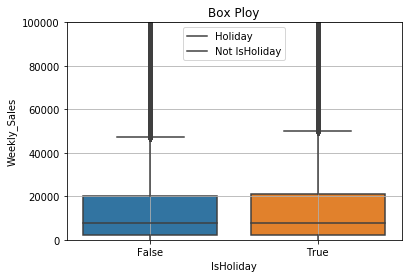

In [92]:
import seaborn as sea

sea.boxplot(x="IsHoliday",y="Weekly_Sales",data=train_total_df)
plt.grid();
plt.ylim((0,100000))
plt.title('Box Ploy');
plt.legend(['Holiday','Not IsHoliday']);
plt.show()

## Observation:

1)we cannot find much difference between the Holiday sale and not Holiday sale

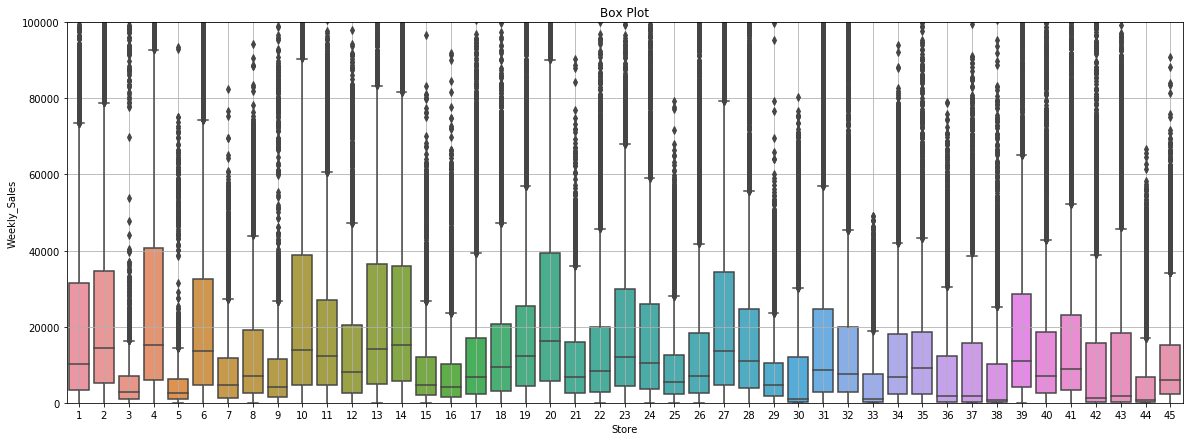

In [93]:
plt.figure(figsize=(20,7))
sea.boxplot(x="Store",y="Weekly_Sales",data=train_total_df)
plt.grid();
plt.ylim((0,100000))
plt.title('Box Plot');

plt.show()

# Observation:

1) we can differentiate between store 3,5,33,44 from other stores 

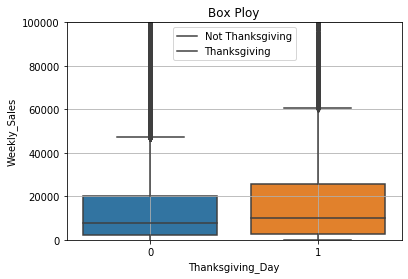

In [94]:
sea.boxplot(x="Thanksgiving_Day",y="Weekly_Sales",data=train_total_df)
plt.grid();
plt.ylim((0,100000))
plt.title('Box Ploy');
plt.legend(['Not Thanksgiving','Thanksgiving']);
plt.show()


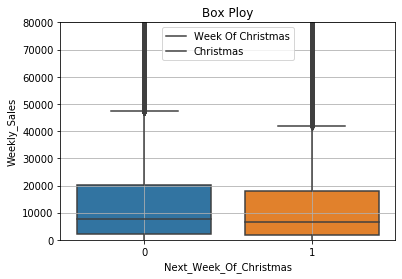

In [95]:
sea.boxplot(x="Next_Week_Of_Christmas",y="Weekly_Sales",data=train_total_df)
plt.grid();
plt.ylim((0,80000))
plt.title('Box Ploy');
plt.legend(['Week Of Christmas','Christmas']);
plt.show()

# Observation

1)There is a slight increase in sales in Thanksgiving day

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



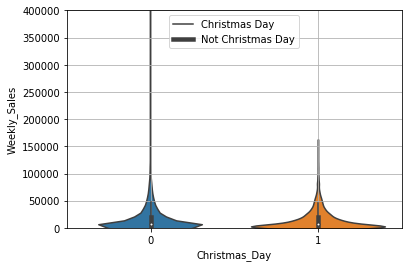

In [38]:
sea.violinplot(x="Christmas_Day", y="Weekly_Sales", data=train_total_df, size=8)
plt.ylim((0,400000))
plt.grid()
plt.legend(['Christmas Day','Not Christmas Day'],loc='upper center')
plt.show()

# Observation

1)There is no difference in salse while Christmas Day,but the PDF is different 

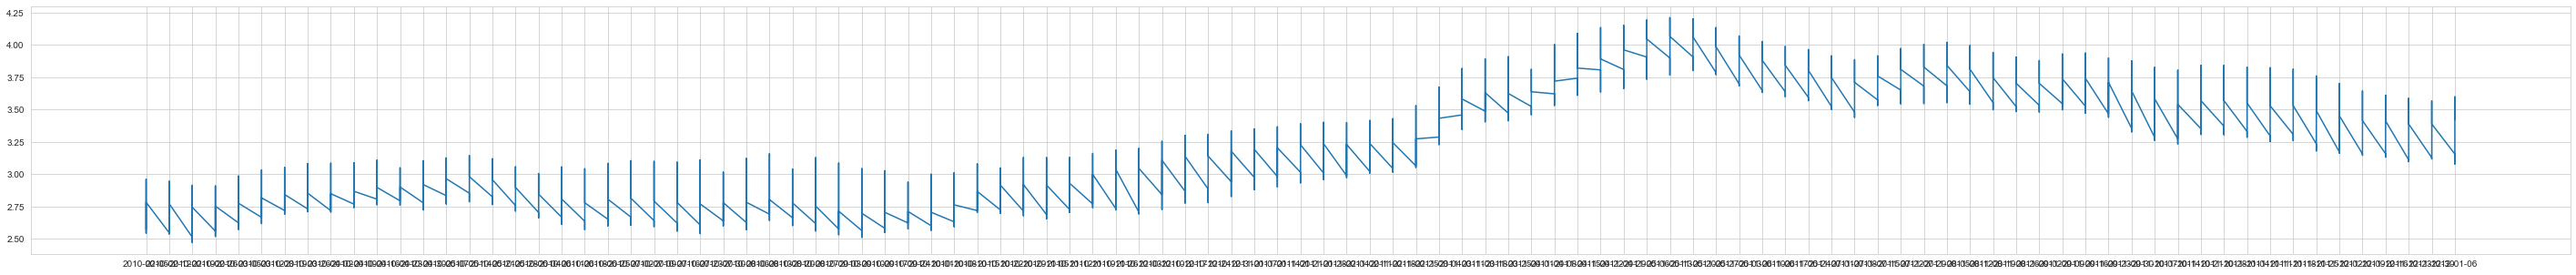

In [144]:
Fuel_Price=train_total_df[['Date','Fuel_Price']]
Fuel_Price.drop_duplicates()
plt.figure(figsize=(50,5))
plt.plot(Fuel_Price['Date'],Fuel_Price['Fuel_Price'])

# Observation

The rate of Fuel is increas in Feb,Mar 2011 

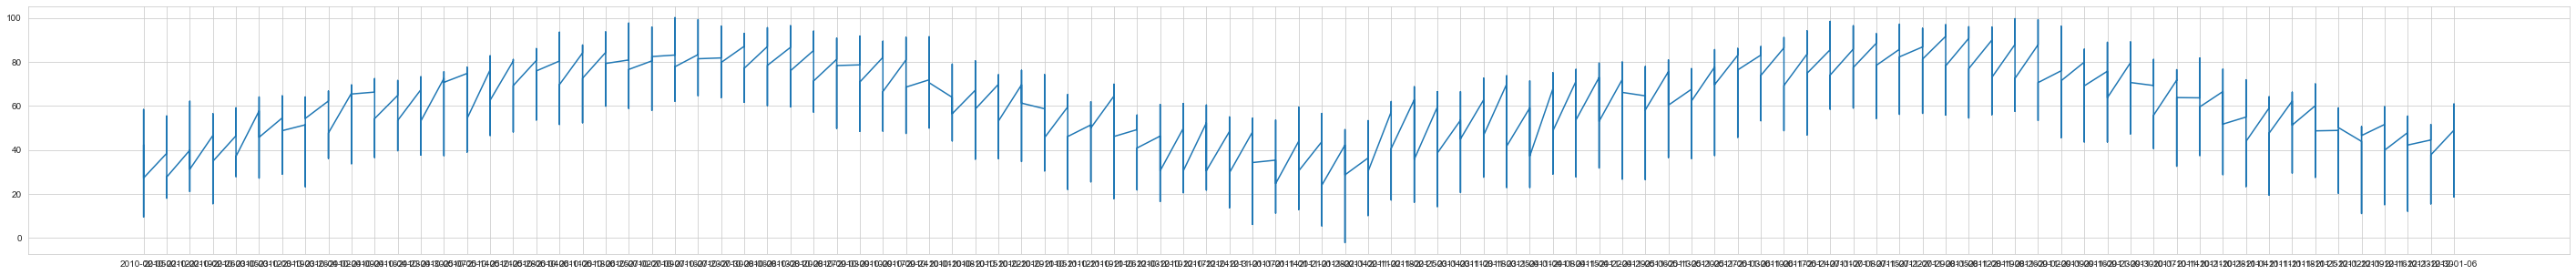

In [150]:
Temperature=train_total_df[['Date','Temperature']]
Temperature.drop_duplicates()
plt.figure(figsize=(50,5))
plt.plot(Temperature['Date'],Temperature['Temperature'])

## Observation

1)The temperature is high in Jun,July

2)The temperature become low at Jan and Dec

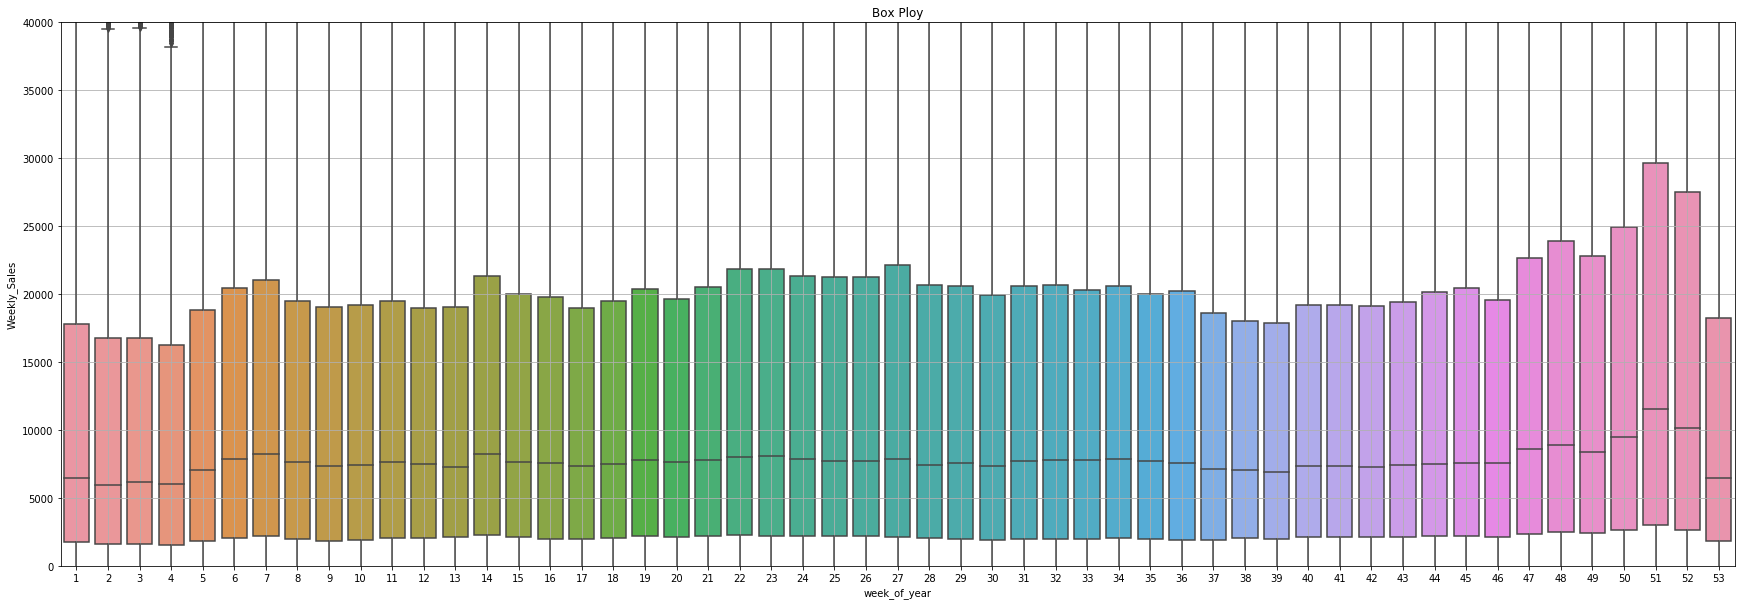

In [41]:
plt.figure(figsize=(30,10))
sea.boxplot(x="week_of_year",y="Weekly_Sales",data=train_total_df)
plt.grid();
plt.ylim((0,40000))
plt.title('Box Ploy');
plt.show()


## Observation

The 47,51 week sales are high

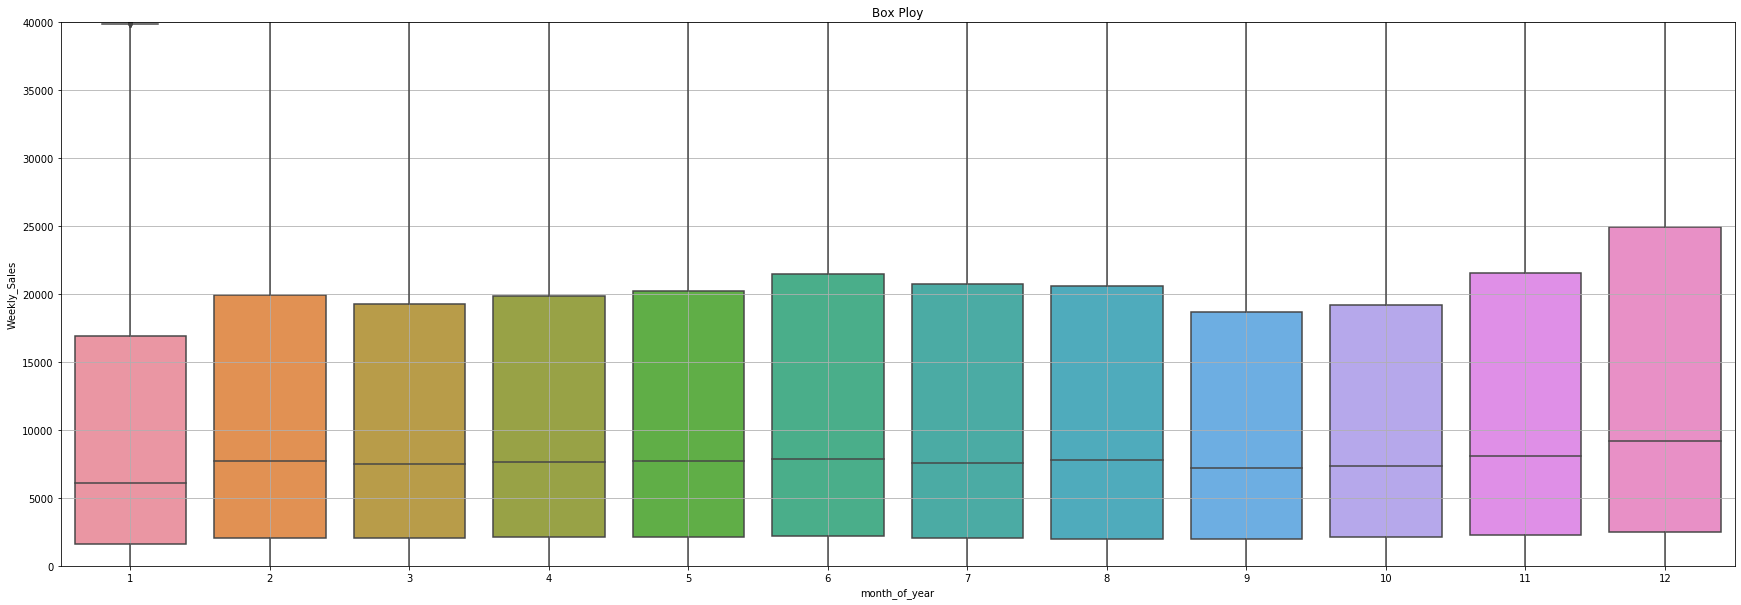

In [42]:
plt.figure(figsize=(30,10))
sea.boxplot(x="month_of_year",y="Weekly_Sales",data=train_total_df)
plt.grid();
plt.ylim((0,40000))
plt.title('Box Ploy');
plt.show()


## Observation

The 11,12 week has better sales ,The 1st week has low sales

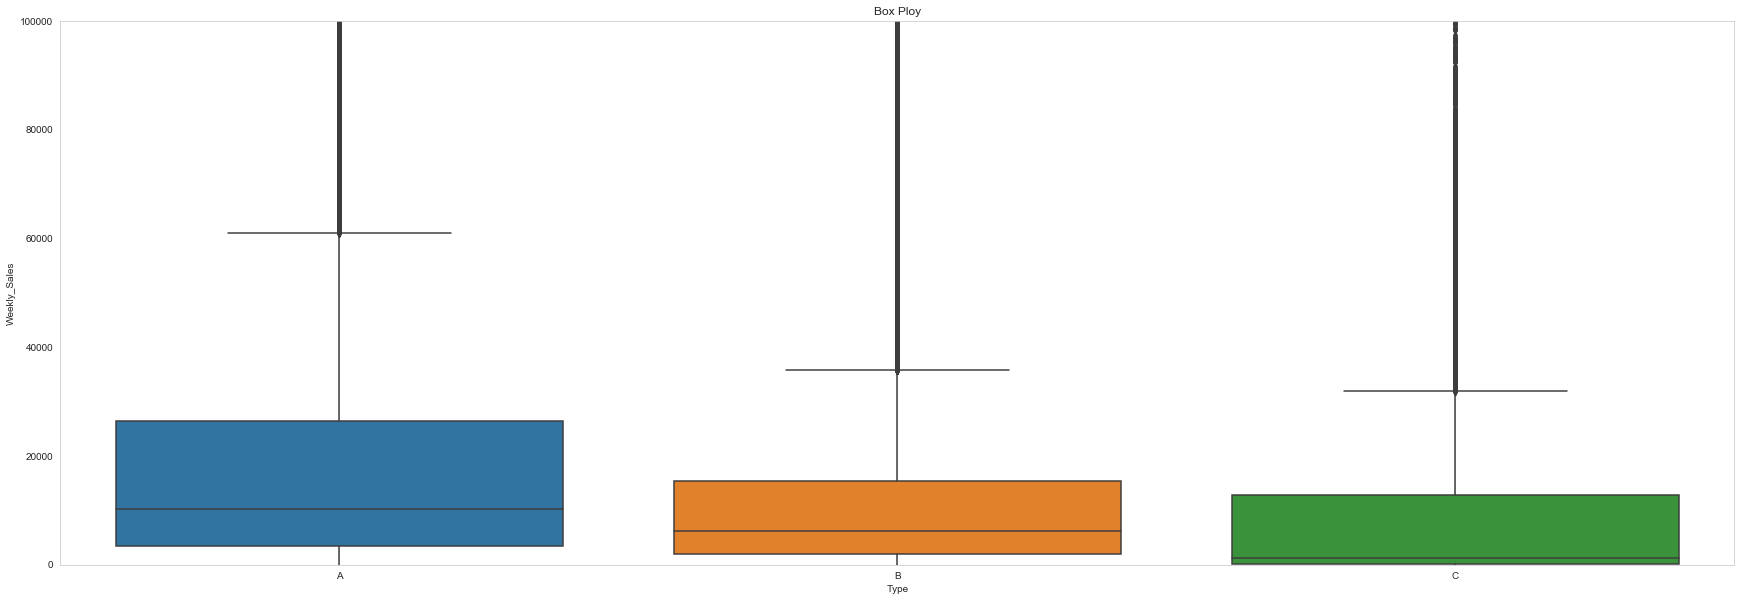

In [168]:
plt.figure(figsize=(30,10))
sea.boxplot(x="Type",y="Weekly_Sales",data=train_total_df)
plt.grid();
plt.ylim((0,100000))
plt.title('Box Ploy');
plt.show()


## Observation

1)Type A has the high sales 

2)we can find some difference between the sales based on  type A,B,C

# Below code is to add the previous year month sales and previous year week sales 

In [4]:
train_df = pd.read_csv("train_final_total_1.csv")

print("Number of data points:",train_df.shape[0])

Number of data points: 421570


In [5]:
test_df = pd.read_csv("test_final_total_1.csv")

print("Number of data points:",test_df.shape[0])

Number of data points: 115064


In [6]:
train_df.head()

,Unnamed: 0,Unnamed: 0.1,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,Labor_Day,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep
0,0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,...,0,0,0,0,0,0,6,2,0,0
1,1,143,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,...,0,0,0,0,0,0,6,2,0,0
2,2,286,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,...,0,0,0,0,0,0,6,2,0,0
3,3,429,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,...,0,0,0,0,0,0,6,2,0,0
4,4,572,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,...,0,0,0,0,0,0,6,2,0,0


In [8]:
total_train=train_df.groupby(['Date','Store','Dept','month_of_year'])['Weekly_Sales'].sum().reset_index()

#total_test=test_df.groupby(['Date','Store','Dept','month_of_year'])['Weekly_Sales'].sum().reset_index()

In [9]:
total_train.head()

,Date,Store,Dept,month_of_year,Weekly_Sales
0,2010-02-05,1,1,2,24924.50
1,2010-02-05,1,2,2,50605.27
2,2010-02-05,1,3,2,13740.12
3,2010-02-05,1,4,2,39954.04
4,2010-02-05,1,5,2,32229.38


In [50]:
total_1=train_df.groupby(['Date','Store','Dept','month_of_year']).sum().reset_index()

In [52]:
total_1.head()

,Date,Store,Dept,month_of_year,Unnamed: 0,Unnamed: 0.1,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,...,Size,date,Super_Bowl_Day,Labor_Day,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year
0,2010-02-05,1,1,2,0,0,24924.50,False,42.31,2.572,...,151315,1265328000,0,0,0,0,0,0,0,6
1,2010-02-05,1,2,2,1,143,50605.27,False,42.31,2.572,...,151315,1265328000,0,0,0,0,0,0,0,6
2,2010-02-05,1,3,2,2,286,13740.12,False,42.31,2.572,...,151315,1265328000,0,0,0,0,0,0,0,6
3,2010-02-05,1,4,2,3,429,39954.04,False,42.31,2.572,...,151315,1265328000,0,0,0,0,0,0,0,6
4,2010-02-05,1,5,2,4,572,32229.38,False,42.31,2.572,...,151315,1265328000,0,0,0,0,0,0,0,6


In [10]:
year_train=[]

year_test=[]

for i,row in train_df.iterrows():
    year_train.append(row['Date'].split('-')[0])
    
for i,row in test_df.iterrows():
    year_test.append(row['Date'].split('-')[0])
        

In [11]:
new_train_total=pd.DataFrame(list(year_train),columns=['year'])

new_test_total=pd.DataFrame(list(year_test),columns=['year'])

In [12]:
new_train_total=pd.concat([train_df, new_train_total], axis=1)

new_test_total=pd.concat([test_df, new_test_total], axis=1)

In [13]:
new_test_total.head()

,Unnamed: 0,Unnamed: 0.1,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep,year
0,0,0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,...,0,0,0,0,0,44,11,0,0,2012
1,1,39,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,...,0,0,0,0,0,44,11,0,0,2012
2,2,78,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,...,0,0,0,0,0,44,11,0,0,2012
3,3,117,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,...,0,0,0,0,0,44,11,0,0,2012
4,4,156,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,...,0,0,0,0,0,44,11,0,0,2012


In [21]:
total_train=new_train_total.groupby(['year','Store','Dept'])['Weekly_Sales'].mean().reset_index()


In [22]:
total_train.head()

,year,Store,Dept,Weekly_Sales
0,2010,1,1,23465.598542
1,2010,1,2,45844.475833
2,2010,1,3,12705.960833
3,2010,1,4,36685.766667
4,2010,1,5,25022.216250


In [19]:
# Create your dictionary class 
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 

# creating the dict with key as year_month_store_dept and the value as weekly sales 

In [20]:
# Main Function 
dict_obj = my_dictionary() 
for i,row in total_train.iterrows():
    dict_obj.add(str(str(row['year'])+'_'+str(row['month_of_year'])+'_'+str(row['Store'])+'_'+str(row['Dept'])),row['Weekly_Sales'])


# Below code is used to get the previous year month sales (median sales)

In [22]:
'''Below code is used to get the previous year month sales (median sales) 

eg:for date '2011-06-17'  i will take the 2010 6th month sales with median we know the previous year sales 
'''

last_year_sales_train=[]
for i,row in new_train_total.iterrows():
    key=str(str(int(row['year'])-1)+'_'+str(row['month_of_year'])+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    if key in  dict_obj.keys() :
        last_year_sales_train.append(dict_obj[key])
    else:
        if row['year']=='2011' and row['month_of_year']=='01':
            key=str(str(int(row['year'])-1)+'_'+str(12)+'_'+str(row['Store'])+'_'+str(row['Dept']))
            key2=str(str(int(row['year'])-1)+'_'+str(11)+'_'+str(row['Store'])+'_'+str(row['Dept']))
            
            last_year_sales_train.append((dict_obj[key]+dict_obj[key2])/2)
        else:
            if row['year']=='2010' or (row['year']=='2011' and row['month_of_year']=='02'):
                
                if row['year']=='2011' and row['month_of_year']=='02':
                    key=str(str(int(row['year']))+'_'+str(int(row['month_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
                    key2=str(str(int(row['year'])-1)+'_'+str(12)+'_'+str(row['Store'])+'_'+str(row['Dept']))
                else:
                    key=str(str(int(row['year']))+'_'+str(int(row['month_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
                    key2=str(str(int(row['year']))+'_'+str(int(row['month_of_year'])-2)+'_'+str(row['Store'])+'_'+str(row['Dept']))
                    
                if key in  dict_obj.keys() :
                    value1=dict_obj[key]
                    if key2 in  dict_obj.keys() :
                        value2=dict_obj[key]
                        last_year_sales_train.append((value2+value1)/2)
                    else:
                        last_year_sales_train.append(0)
                else:
                    last_year_sales_train.append(0)

        
last_year_sales_test=[]
for i,row in new_test_total.iterrows():
    key=str(str(int(row['year'])-1)+'_'+str(row['month_of_year'])+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    if key in  dict_obj.keys() :
        last_year_sales_test.append(dict_obj[key])
    else:
        last_year_sales_test.append(0)
        

In [23]:
last_year_sales_train_df=pd.DataFrame(list(last_year_sales_train),columns=['last_year_sales'])

last_year_sales_test_df=pd.DataFrame(list(last_year_sales_test),columns=['last_year_sales'])

In [24]:
new_train_total_df=pd.concat([train_df, last_year_sales_train_df], axis=1)

new_test_total_df=pd.concat([test_df, last_year_sales_test_df], axis=1)

In [25]:
new_train_total_df.head()

,Unnamed: 0,Unnamed: 0.1,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep,last_year_sales
0,0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,...,0,0,0,0,0,6,2,0,0,0.0
1,1,143,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,...,0,0,0,0,0,6,2,0,0,0.0
2,2,286,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,...,0,0,0,0,0,6,2,0,0,0.0
3,3,429,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,...,0,0,0,0,0,6,2,0,0,0.0
4,4,572,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,...,0,0,0,0,0,6,2,0,0,0.0


In [26]:
new_train_total_df=new_train_total_df[new_train_total_df['Weekly_Sales']>=0]



# Below code is used to get the previous year week sales (median sales)

In [ ]:
''' Like before we know the previous year week sales '''

last_year_week_dept_sales=[]

for i,row in new_train_total.iterrows():
    key1=str(str(int(row['year'])-1)+'_'+str(row['week_of_year'])+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    key2=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    key3=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])+1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    if key1 in  dict_obj.keys() :
        count=1
        value1=dict_obj[key1]
        value2=0
        value3=0
        if key2 in  dict_obj.keys() :
            value2=dict_obj[key2]
            count=2
            
        if  key3 in  dict_obj.keys() :
            value3=dict_obj[key3]
            count=3
            
            
        last_year_week_dept_sales.append((value1+value2+value3)/count)
        
    elif row['Date']=='2010-02-05' or row['Date']=='2010-02-12':
        last_year_week_dept_sales.append(0)

        
    elif row['year']=='2010' or  row['Date']=='2011-02-04' or  row['Date']=='2011-01-21'  or  row['Date']=='2011-01-28'  \
                                 or  row['Date']=='2011-01-14' or  row['Date']=='2011-01-07':
        #key1=str(str(row['year'])+'_'+str(row['week_of_year'])+'_'+str(row['Store'])+'_'+str(row['Dept']))
        
        key1=str(str(row['year'])+'_'+str(int(row['week_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        
        key2=str(str(row['year'])+'_'+str(int(row['week_of_year'])-2)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        
        key3=str(str(row['year'])+'_'+str(int(row['week_of_year'])-3)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        
        if  row['Date']=='2011-01-07' or  row['Date']=='2011-01-14':
            
            key1=str(str(int(row['year'])-1)+'_'+str(53)+'_'+str(row['Store'])+'_'+str(row['Dept']))
            
            key2=str(str(int(row['year'])-1)+'_'+str(52)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        
            key3=str(str(int(row['year'])-1)+'_'+str(51)+'_'+str(row['Store'])+'_'+str(row['Dept']))
            
            if row['Date']=='2011-01-14':
                key3=key2
                key2=key1
                key1=str(str(int(row['year']))+'_'+str(1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        
           
        
        
        value3=0
        value2=0
        value1=0
        count=1
        if key1 in  dict_obj.keys() :
            value1=dict_obj[key1]
            count=1
            
            if key2 in  dict_obj.keys() :
                value2=dict_obj[key2]
                count=2
                
            if key3 in  dict_obj.keys() :
                value3=dict_obj[key3]
                count=3
            
            last_year_week_dept_sales.append((value1+value2+value3)/count)
            
        else:
            last_year_week_dept_sales.append(0)
            
    else:
            last_year_week_dept_sales.append(0)
            
  

In [ ]:
test_last_year_week_dept_sales=[]

for i,row in new_test_total.iterrows():
    key1=str(str(int(row['year'])-1)+'_'+str(row['week_of_year'])+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    key2=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    key3=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])+1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
    
    if key1 in  dict_obj.keys() :
        count=1
        value1=dict_obj[key1]
        value2=0
        value3=0
        if key2 in  dict_obj.keys() :
            value2=dict_obj[key2]
            count=2
            
        if  key3 in  dict_obj.keys() :
            value3=dict_obj[key3]
            count=3
            
            
        test_last_year_week_dept_sales.append((value1+value2+value3)/count)
        
    else:
        test_last_year_week_dept_sales.append(0)
            

In [ ]:
new_train_total_1=pd.DataFrame(list(last_year_week_dept_sales),columns=['last_year_week_dept_sales'])

new_test_total_1=pd.DataFrame(list(test_last_year_week_dept_sales),columns=['last_year_week_dept_sales'])

In [ ]:
train_total=pd.concat([new_train_total, new_train_total_1], axis=1)

test_total=pd.concat([new_test_total, new_test_total_1], axis=1)

In [ ]:
train_total.to_csv('final_train_2.csv')

test_total.to_csv('final_test_2.csv')

<Figure size 7200x2160 with 0 Axes>

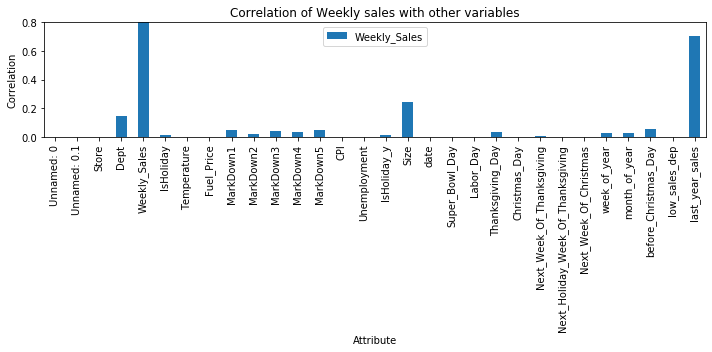

In [120]:
#https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable
plt.figure(figsize=(100,30))
df_corr = new_train_total_df.corr()

ax=df_corr[['Weekly_Sales']].plot(kind='bar',figsize=(10,5))
plt.ylim((0,0.8))
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()



## Observation

1)The Department ,size of the store are having high correlation with weekly sale

2)Holiday,MarkDown,date,Thanksgiving day week has some correlation  

In [308]:
train_correlation = pd.read_csv("final_train.csv")

print("Number of data points:",train_correlation.shape[0])

Number of data points: 296222


In [309]:
test_correlation = pd.read_csv("final_test.csv")

print("Number of data points:",test_correlation.shape[0])

Number of data points: 79575


# ANOVA Test

In [258]:
def add(arr):
    temp=0
    for i in range(len(arr)):
        temp=temp+int(arr[i])
        
    return temp
        

In [310]:
# there are 3 classes Type A,B,C

test_A=train_correlation[train_correlation['Type']=='A'][:3]
test_B=train_correlation[train_correlation['Type']=='B'][:3]
test_C=train_correlation[train_correlation['Type']=='C'][:3]

In [311]:
n1=len(test_A)
n2=len(test_B)
n3=len(test_C)

In [312]:
x1=test_A['Weekly_Sales'].mean()
x2=test_B['Weekly_Sales'].mean()
x3=test_C['Weekly_Sales'].mean()


total=pd.concat([test_A,test_B,test_C])
total_mean=total['Weekly_Sales'].mean()

In [313]:
s1=test_A['Weekly_Sales'].values - test_A['Weekly_Sales'].mean()
s2=test_B['Weekly_Sales'].values - test_B['Weekly_Sales'].mean()
s3=test_C['Weekly_Sales'].values - test_C['Weekly_Sales'].mean()

In [314]:
s1=add(s1)
s2=add(s2)
s3=add(s3)

In [315]:
SSb=(n1 * ((x1-total_mean)**2))+(n2 * ((x2-total_mean)**2))+(n3 * ((x3-total_mean)**2))     

In [316]:
SSe=((s1)**2 + (s2)**2 + (s3)**2)

In [317]:
MSB=SSb/2
MSE=SSe/((n1+n2+n3)-3)

In [318]:
F_score= MSB/MSE

In [319]:
F_score

2651160700.456265

# Using LinearRegression to find the correlation

In [321]:
from sklearn.preprocessing import OneHotEncoder 

type_onehotencoder = OneHotEncoder() 
type_onehotencoder.fit(train_correlation[['Type']])

train_type_one_hot=type_onehotencoder.transform(train_correlation[['Type']])
test_type_one_hot=type_onehotencoder.transform(test_correlation[['Type']])

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

lr_reg=LinearRegression()
lr_reg.fit(train_type_one_hot, train_correlation['Weekly_Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
Y_pred = lr_reg.predict(test_type_one_hot)

In [325]:
print("The MAE for  LinearRegression : ",mean_absolute_error(test_correlation['Weekly_Sales'],Y_pred))

The MAE for  LinearRegression :  14778.948758620072


# Find the correlation between Store

In [326]:
from sklearn.preprocessing import OneHotEncoder 

Store_onehotencoder = OneHotEncoder() 
Store_onehotencoder.fit(train_correlation[['Store']])

train_Store_one_hot=Store_onehotencoder.transform(train_correlation[['Store']])
test_Store_one_hot=Store_onehotencoder.transform(test_correlation[['Store']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [327]:
lr_reg=LinearRegression()
lr_reg.fit(train_Store_one_hot, train_correlation['Weekly_Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [328]:
Y_pred = lr_reg.predict(test_Store_one_hot)

In [329]:
print("The MAE for  LinearRegression : ",mean_absolute_error(test_correlation['Weekly_Sales'],Y_pred))

The MAE for  LinearRegression :  14246.31138042827


# Observation

1) compare to store type the store feature has correlation